<a href="https://colab.research.google.com/github/RodrigoEslava/USP-IQ-Biochemistry-Masters/blob/main/analise_semantica_dor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

irei avaliar a relaçao semantica de 4 métodos
similaridade de cosseno
distancia euclediana
clustering
xgboost

Carregar Embeddings

Identificar Proteínas Relacionadas à Dor

In [ ]:
def load_embeddings(filename):
    embeddings = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(' ')
            node = parts[0]
            vector = list(map(float, parts[1:]))
            embeddings[node] = vector
    return embeddings

filename = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'
embeddings = load_embeddings(filename)

# Agora você pode acessar os vetores assim:
embeddings['114781']# 114781 0.066341	-0.262894	0.089086	0.001685	0.265541	-0.065036	-0.030766	0.357777	0.670194

[-0.09938354,
 0.058384698,
 -0.58293396,
 -0.24175341,
 -0.48954225,
 0.2760077,
 0.23833019,
 -0.029896474,
 -0.26257876,
 -0.361431,
 -0.174122,
 0.33548954,
 -0.25738606,
 0.1810721,
 -0.37103075,
 0.19564657,
 -0.08063163,
 0.2247146,
 -0.14147231,
 -0.23328604,
 -0.3570228,
 -0.3765681,
 0.25583065,
 -0.49893597,
 0.079083726,
 0.38242057,
 0.002361796,
 -0.052118067,
 -0.0810185,
 0.21539861,
 -0.3195735,
 -0.11969744,
 -0.24488078,
 -0.20563984,
 0.14461608,
 -0.13621464,
 0.25069007,
 -0.046720173,
 0.32377362,
 0.22171117,
 -0.43935403,
 0.066340655,
 -0.2628939,
 0.0890862,
 0.0016853517,
 0.2655405,
 -0.06503557,
 -0.030766016,
 0.35777706,
 0.6701944]

In [ ]:
import numpy as np

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")



Carregado 28323 embeddings com 50 dimensões.


In [ ]:
import pandas as pd

df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')
# Acessando a coluna 'Nome' diretamente como uma lista
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
len(pain_protein_ids)

418

In [ ]:

#pain_protein_ids = ['388591']   #Adicione todos os IDs de proteínas relacionadas à dor

pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]
len(pain_protein_indices)

418

Carregado 28323 embeddings com 50 dimensões.


<ipython-input-17-da8164ac348a>:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_euclidean = linkage(euclidean_dist, 'average')


<Figure size 1000x800 with 0 Axes>

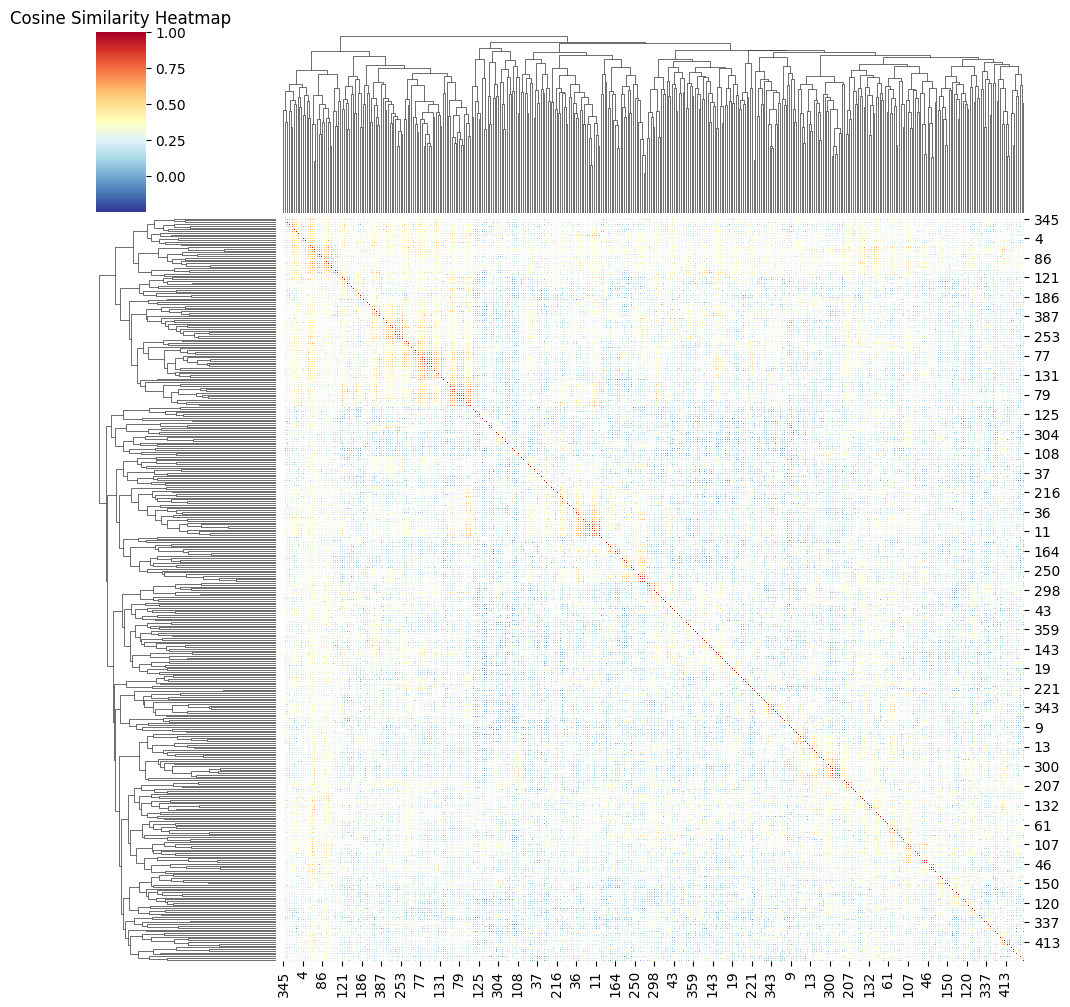

<Figure size 1000x800 with 0 Axes>

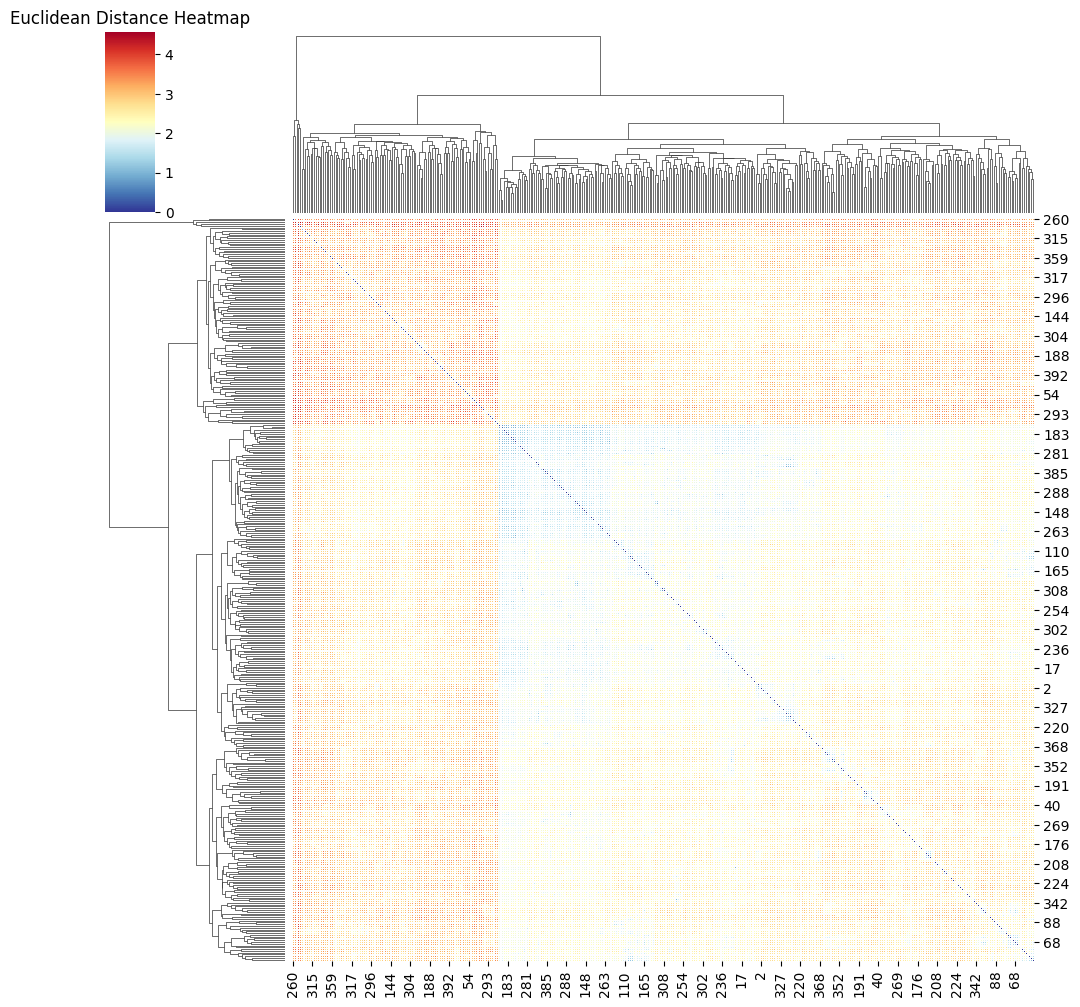

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico
linked_cosine = linkage(cosine_sim, 'average')
linked_euclidean = linkage(euclidean_dist, 'average')

# Plotar heatmap da similaridade de cosseno com dendograma
plt.figure(figsize=(10, 8))
sns.clustermap(cosine_sim, row_linkage=linked_cosine, col_linkage=linked_cosine, cmap='RdYlBu_r', linewidths=0.5)
plt.title('Cosine Similarity Heatmap')
plt.show()

# Plotar heatmap da distância Euclidiana com dendograma
plt.figure(figsize=(10, 8))
sns.clustermap(euclidean_dist, row_linkage=linked_euclidean, col_linkage=linked_euclidean, cmap='RdYlBu_r', linewidths=0.5)
plt.title('Euclidean Distance Heatmap')
plt.show()


Carregado 28323 embeddings com 50 dimensões.


<ipython-input-20-c7403fc6c52c>:45: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_euclidean = linkage(euclidean_dist, 'average')


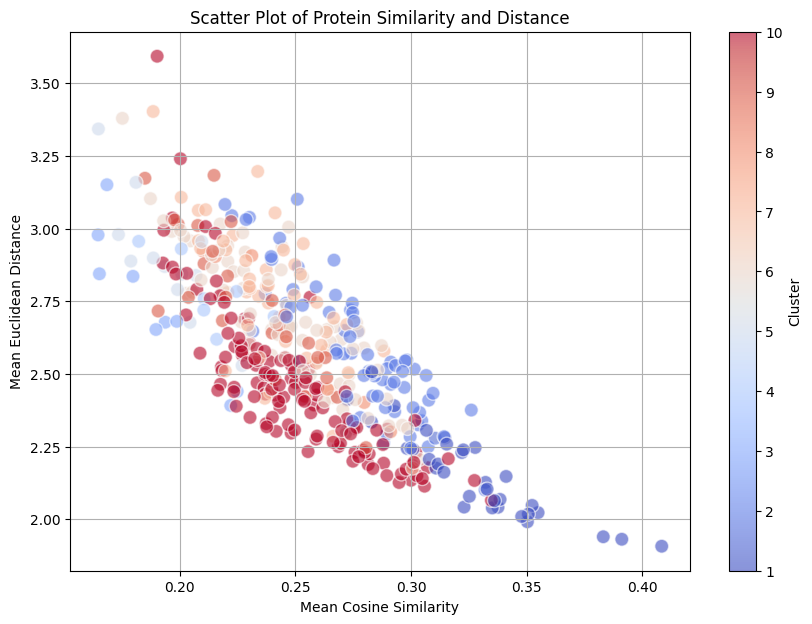

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico
linked_cosine = linkage(cosine_sim, 'average')
linked_euclidean = linkage(euclidean_dist, 'average')

# Definir número de clusters
num_clusters = 10
clusters = fcluster(linked_cosine, num_clusters, criterion='maxclust')

# Calcular coordenadas médias
mean_cosine_sim = np.mean(cosine_sim, axis=1)
mean_euclidean_dist = np.mean(euclidean_dist, axis=1)

# Scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(mean_cosine_sim, mean_euclidean_dist, c=clusters, cmap='coolwarm', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Protein Similarity and Distance')
plt.xlabel('Mean Cosine Similarity')
plt.ylabel('Mean Euclidean Distance')
plt.colorbar(scatter, ticks=range(1, num_clusters + 1), label='Cluster')
plt.grid(True)
plt.show()


Carregado 28323 embeddings com 50 dimensões.


<ipython-input-22-89e3b7e4e069>:45: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_euclidean = linkage(euclidean_dist, 'average')


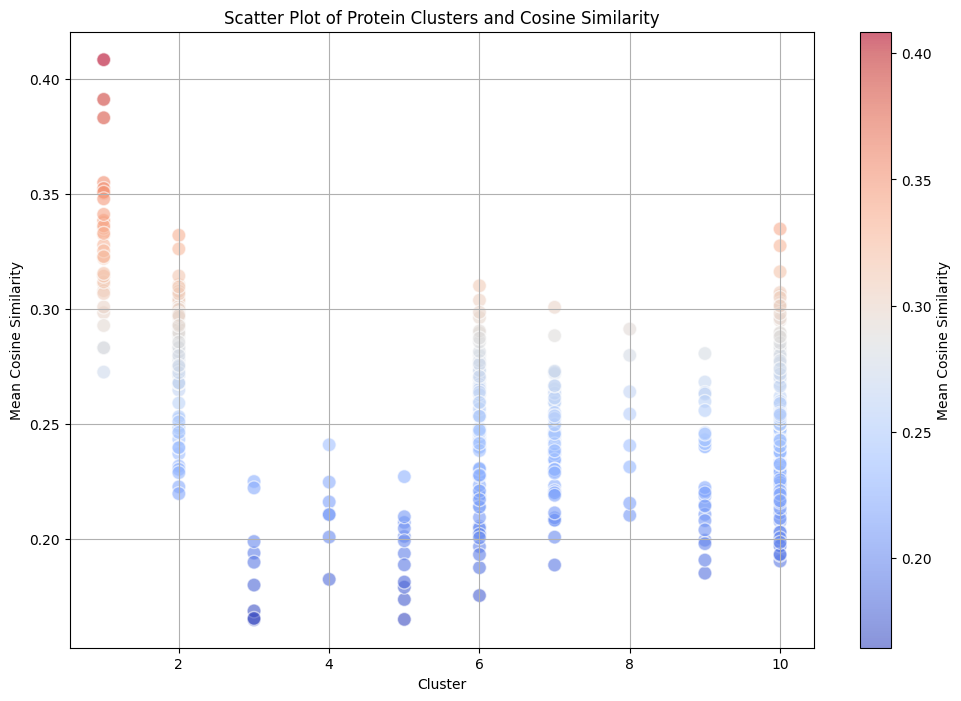

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico
linked_cosine = linkage(cosine_sim, 'average')
linked_euclidean = linkage(euclidean_dist, 'average')

# Definir número de clusters
num_clusters = 10
clusters = fcluster(linked_cosine, num_clusters, criterion='maxclust')

# Calcular coordenadas médias de similaridade do cosseno
mean_cosine_sim = np.mean(cosine_sim, axis=1)

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(clusters, mean_cosine_sim, c=mean_cosine_sim, cmap='coolwarm', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Protein Clusters and Cosine Similarity')
plt.xlabel('Cluster')
plt.ylabel('Mean Cosine Similarity')
plt.colorbar(scatter, label='Mean Cosine Similarity')
plt.grid(True)
plt.show()


Carregado 28323 embeddings com 50 dimensões.


<ipython-input-24-4a6f271c5b2b>:45: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_euclidean = linkage(euclidean_dist, 'average')


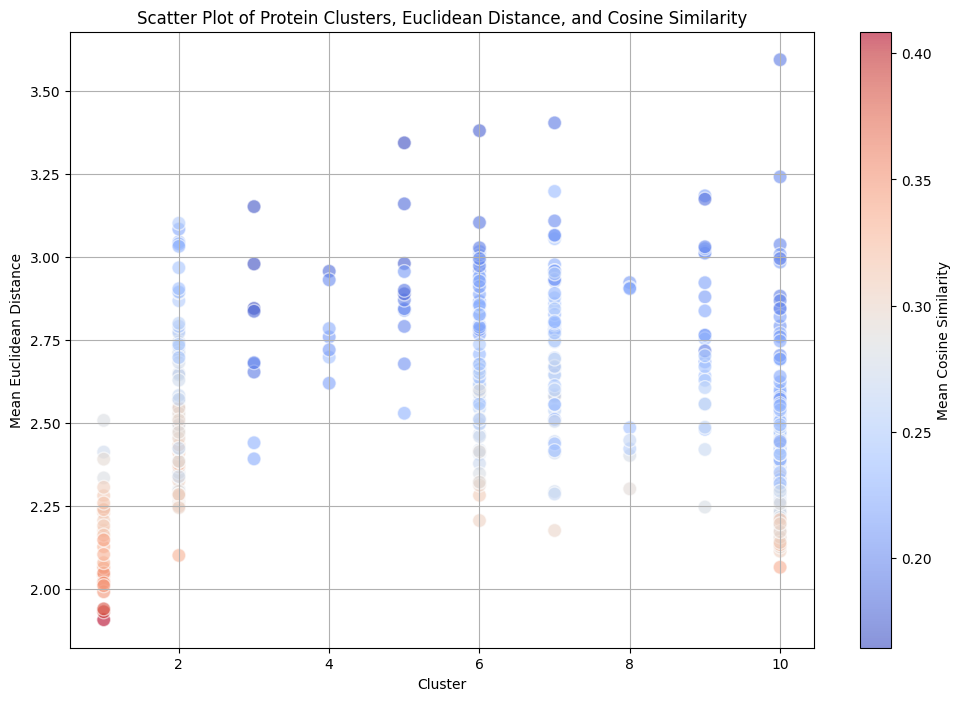

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico
linked_cosine = linkage(cosine_sim, 'average')
linked_euclidean = linkage(euclidean_dist, 'average')

# Definir número de clusters
num_clusters = 10
clusters = fcluster(linked_cosine, num_clusters, criterion='maxclust')

# Calcular coordenadas médias de similaridade do cosseno e distância euclidiana
mean_cosine_sim = np.mean(cosine_sim, axis=1)
mean_euclidean_dist = np.mean(euclidean_dist, axis=1)

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(clusters, mean_euclidean_dist, c=mean_cosine_sim, cmap='coolwarm', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Protein Clusters, Euclidean Distance, and Cosine Similarity')
plt.xlabel('Cluster')
plt.ylabel('Mean Euclidean Distance')
plt.colorbar(scatter, label='Mean Cosine Similarity')
plt.grid(True)
plt.show()


Carregado 28323 embeddings com 50 dimensões.


<ipython-input-26-fa64ca440640>:45: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_euclidean = linkage(euclidean_dist, 'average')


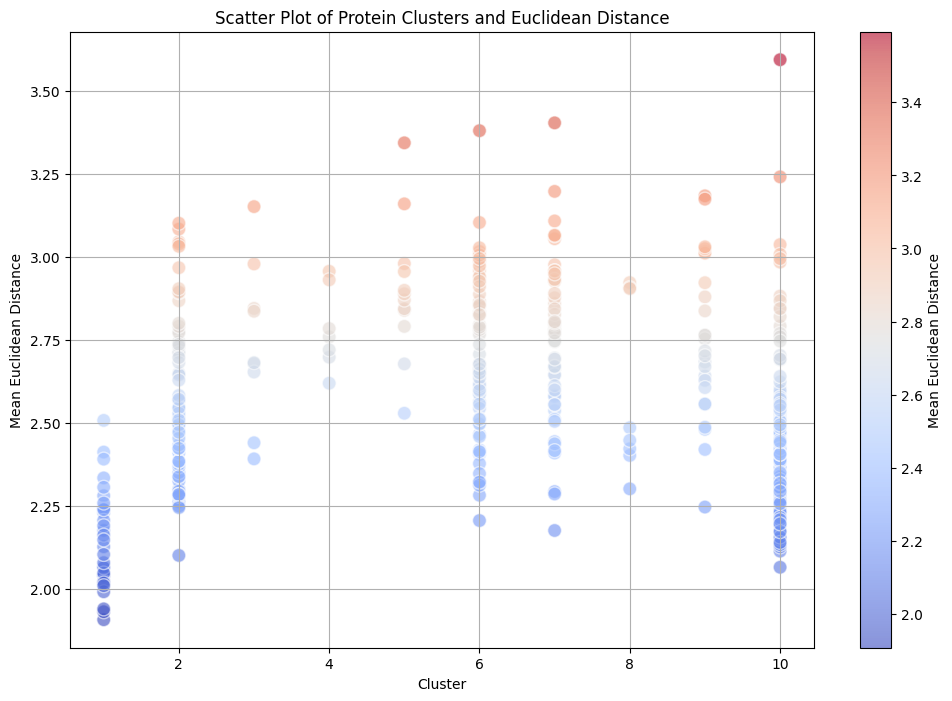

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico
linked_cosine = linkage(cosine_sim, 'average')
linked_euclidean = linkage(euclidean_dist, 'average')

# Definir número de clusters
num_clusters = 10
clusters = fcluster(linked_cosine, num_clusters, criterion='maxclust')

# Calcular coordenadas médias de distância euclidiana
mean_euclidean_dist = np.mean(euclidean_dist, axis=1)

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(clusters, mean_euclidean_dist, c=mean_euclidean_dist, cmap='coolwarm', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Protein Clusters and Euclidean Distance')
plt.xlabel('Cluster')
plt.ylabel('Mean Euclidean Distance')
plt.colorbar(scatter, label='Mean Euclidean Distance')
plt.grid(True)
plt.show()


Carregado 28323 embeddings com 50 dimensões.


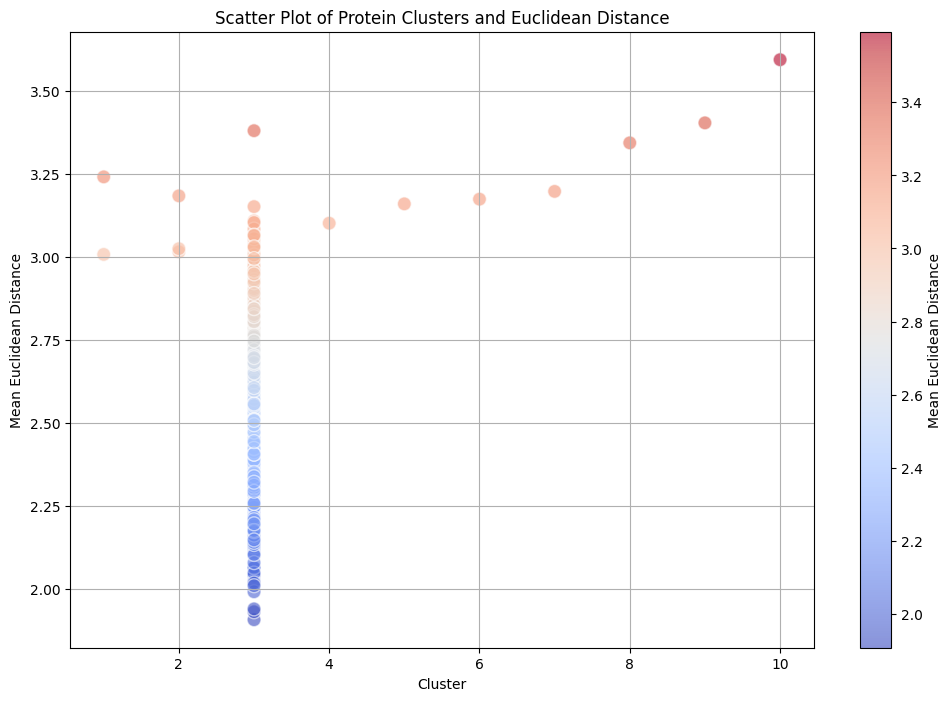

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]

# Obter embeddings das proteínas de dor
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

# Calcular similaridade do cosseno
cosine_sim = cosine_similarity(pain_protein_embeddings)

# Calcular distância Euclidiana
euclidean_dist = cdist(pain_protein_embeddings, pain_protein_embeddings, 'euclidean')

# Clustering hierárquico baseado nos embeddings
linked_embeddings = linkage(pain_protein_embeddings, 'average')

# Definir número de clusters
num_clusters = 10
clusters = fcluster(linked_embeddings, num_clusters, criterion='maxclust')

# Calcular coordenadas médias de distância euclidiana
mean_euclidean_dist = np.mean(euclidean_dist, axis=1)

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(clusters, mean_euclidean_dist, c=mean_euclidean_dist, cmap='coolwarm', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Protein Clusters and Euclidean Distance')
plt.xlabel('Cluster')
plt.ylabel('Mean Euclidean Distance')
plt.colorbar(scatter, label='Mean Euclidean Distance')
plt.grid(True)
plt.show()


Carregado 28323 embeddings com 50 dimensões.
Número ideal de clusters: 297


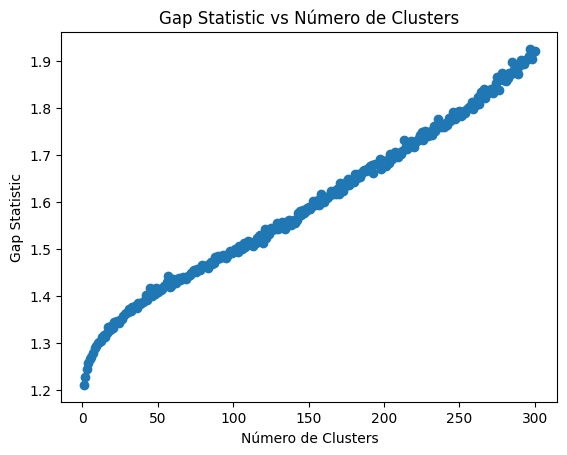

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'  # Atualize com o caminho correto
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')  # Atualize com o caminho correto
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids]
pain_protein_embeddings = protein_embeddings[pain_protein_indices]

def calculate_gap_statistic(data, refs=None, nrefs=20, max_clusters=10):
    shape = data.shape
    if refs is None:
        tops = data.max(axis=0)
        bottoms = data.min(axis=0)
        dists = np.diag(tops - bottoms)
        rands = np.random.random_sample(size=(nrefs, shape[0], shape[1]))
        refs = rands @ dists + bottoms

    gaps = np.zeros((max_clusters,))
    gap_std_err = np.zeros((max_clusters,))
    results = []
    for k in range(1, max_clusters+1):
        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        disp = km.inertia_
        refdisps = np.zeros((refs.shape[0],))
        for i in range(refs.shape[0]):
            km.fit(refs[i])
            refdisps[i] = km.inertia_
        gap = np.log(np.mean(refdisps)) - np.log(disp)
        gap_std_err[k-1] = np.std(np.log(refdisps)) / np.sqrt(nrefs)
        gaps[k-1] = gap
        results.append({'clusterCount': k, 'gap': gap, 'gap_std_err': gap_std_err[k-1]})

    resultsdf = pd.DataFrame(results)
    return gaps, gap_std_err, resultsdf

# Calcular o Gap Statistic para os embeddings das proteínas de dor
gaps, resultsdf,  resultsdf = calculate_gap_statistic(pain_protein_embeddings, nrefs=20, max_clusters=300)

# Determinar o número ideal de clusters
optimalK = resultsdf['clusterCount'][resultsdf['gap'].idxmax()]
print(f"Número ideal de clusters: {optimalK}")

# Visualizar o Gap Statistic
plt.plot(resultsdf['clusterCount'], resultsdf['gap'], marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs Número de Clusters')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Gap_Statistic_vs_Numero_de_Clusters.png'

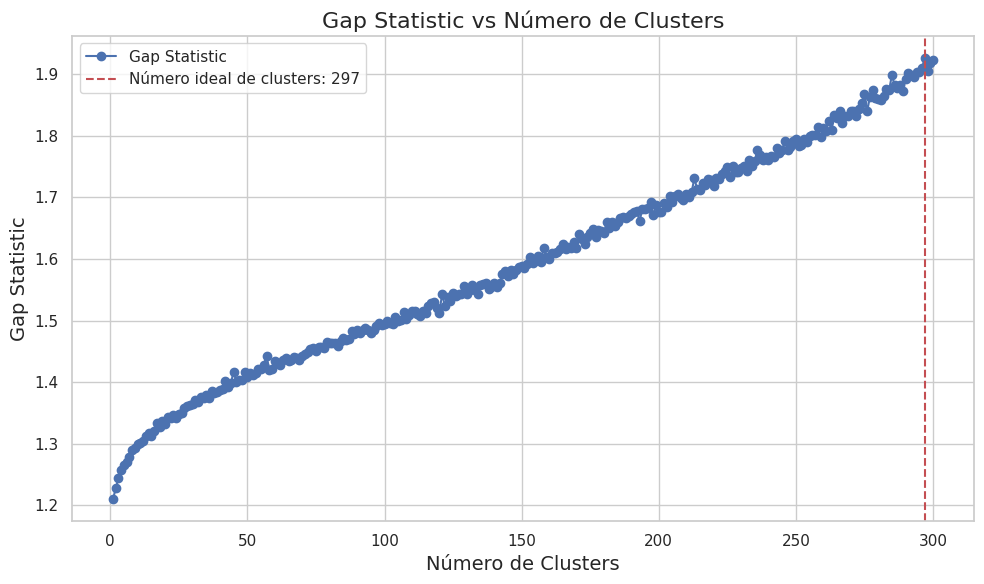

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Plotar o Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(resultsdf['clusterCount'], resultsdf['gap'], marker='o', linestyle='-', color='b', label='Gap Statistic')

# Adicionar título e rótulos aos eixos
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Gap Statistic', fontsize=14)
plt.title('Gap Statistic vs Número de Clusters', fontsize=16)

# Adicionar linha de grade
plt.grid(True)

# Marcar o ponto do número ideal de clusters
plt.axvline(x=optimalK, linestyle='--', color='r', label=f'Número ideal de clusters: {optimalK}')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.savefig('/mnt/data/Gap_Statistic_vs_Numero_de_Clusters.png', dpi=300)
plt.show()


Clusterização

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Executar K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0).fit(protein_embeddings)

# Obter rótulos dos clusters
labels_kmeans = kmeans.labels_

# Verificar a qualidade dos clusters usando Silhouette Score
silhouette_avg = silhouette_score(protein_embeddings, labels_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Analisar a composição dos clusters para ver quantos contêm proteínas da dor
pain_clusters = set(labels_kmeans[pain_protein_indices])
for cluster in pain_clusters:
    cluster_indices = np.where(labels_kmeans == cluster)[0]
    num_pain_proteins = sum(np.isin(cluster_indices, pain_protein_indices))
    print(f"Cluster {cluster} contém {len(cluster_indices)} proteínas, das quais {num_pain_proteins} são proteínas da dor.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.06313648846106688
Cluster 0 contém 4057 proteínas, das quais 103 são proteínas da dor.
Cluster 2 contém 2581 proteínas, das quais 31 são proteínas da dor.
Cluster 4 contém 1749 proteínas, das quais 3 são proteínas da dor.
Cluster 5 contém 613 proteínas, das quais 2 são proteínas da dor.
Cluster 7 contém 4058 proteínas, das quais 71 são proteínas da dor.
Cluster 8 contém 9966 proteínas, das quais 134 são proteínas da dor.
Cluster 9 contém 3308 proteínas, das quais 74 são proteínas da dor.


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors



# Encontrar os vizinhos mais próximos das seeds
num_neighbors = 50  # Defina o número de vizinhos a serem considerados
neighbors = NearestNeighbors(n_neighbors=num_neighbors).fit(protein_embeddings)
distances, indices = neighbors.kneighbors(protein_embeddings[pain_protein_indices])

# Obter os índices únicos das seeds e de seus vizinhos
unique_indices = np.unique(indices.flatten())

# Extrair os embeddings correspondentes
selected_embeddings = protein_embeddings[unique_indices]
from sklearn.metrics.pairwise import cosine_similarity

# Calcular a matriz de similaridade do cosseno
similarity_matrix = cosine_similarity(selected_embeddings)


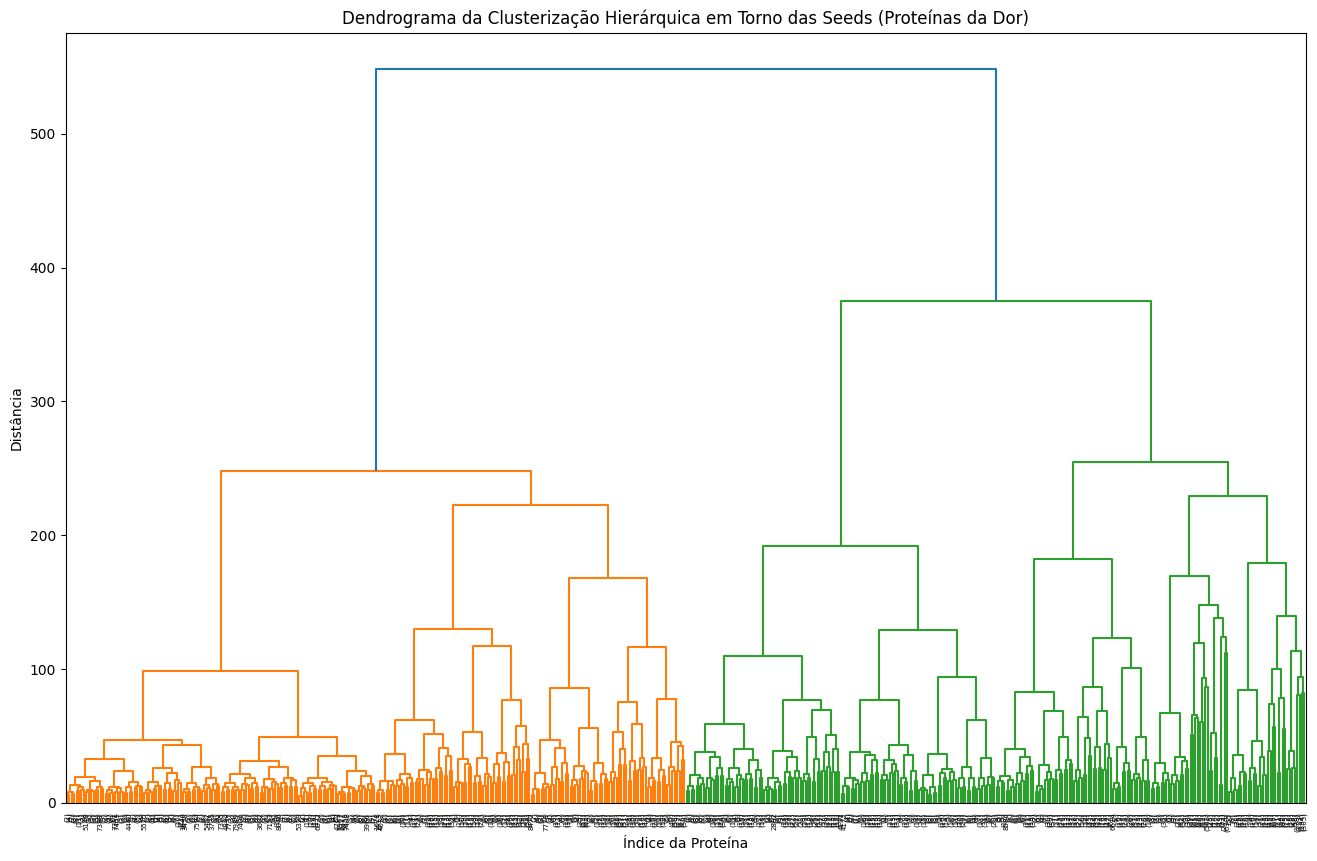

Número de clusters encontrados: 925


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# Aplicar a clusterização hierárquica usando o método de Ward
Z = linkage(similarity_matrix, method='complete')

# Plotar o dendrograma
plt.figure(figsize=(16, 10))
dendrogram(Z, truncate_mode='level', p=8)
plt.title('Dendrograma da Clusterização Hierárquica em Torno das Seeds (Proteínas da Dor)')
plt.xlabel('Índice da Proteína')
plt.ylabel('Distância')
plt.show()

# Definir o número de clusters
max_d = 100  # Defina isso com base no dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

# Contar o número de clusters
num_clusters = len(set(clusters))
print(f"Número de clusters encontrados: {num_clusters}")


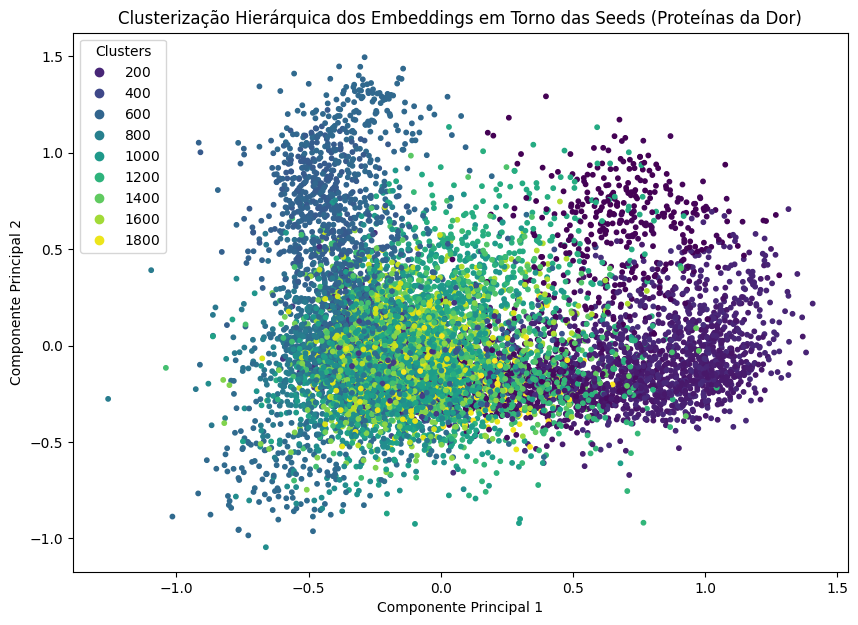

In [ ]:
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(selected_embeddings)

# Visualizar os clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('Clusterização Hierárquica dos Embeddings em Torno das Seeds (Proteínas da Dor)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


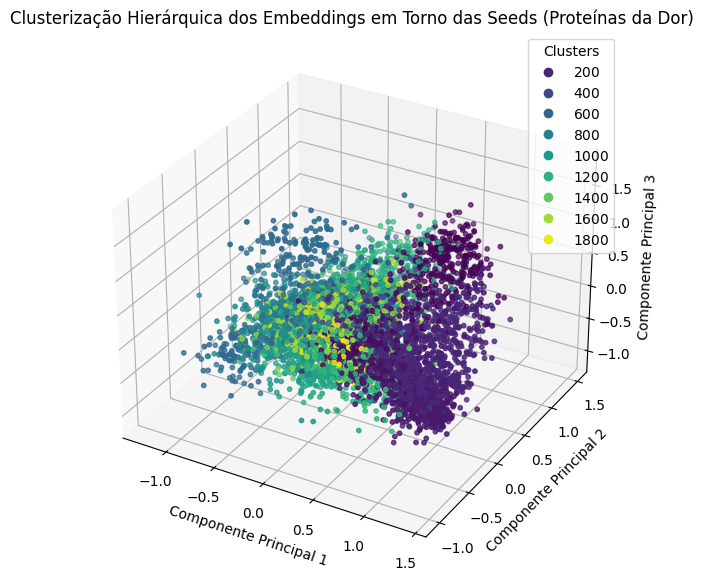

In [ ]:
# Reduzir a dimensionalidade para 3D
pca = PCA(n_components=3)
reduced_embeddings_3d = pca.fit_transform(selected_embeddings)

# Visualizar os clusters em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], c=clusters, cmap='viridis', s=10)
ax.set_title('Clusterização Hierárquica dos Embeddings em Torno das Seeds (Proteínas da Dor)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

teste

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns



# Carregar o DataFrame de símbolos (apenas para as proteínas da dor)
df_symbols = df_dicionario_dor
df_symbols['ID Correspondente']  = df_symbols['ID Correspondente'].astype(str)
# Mapear IDs para Símbolos (somente para as proteínas da dor)
id_to_symbol = pd.Series(df_symbols['Alt ID'].values, index=df_symbols['ID Correspondente']).to_dict()

# Selecionar as proteínas da dor
pain_protein_indices = [protein_ids.index(id_) for id_ in df_symbols['ID Correspondente']]
pain_protein_ids = [protein_ids[i] for i in pain_protein_indices]

# Encontrar os vizinhos mais próximos das seeds (proteínas da dor)
num_neighbors = 20  # Defina o número de vizinhos a serem considerados
neighbors = NearestNeighbors(n_neighbors=num_neighbors).fit(protein_embeddings)
distances, indices = neighbors.kneighbors(protein_embeddings[pain_protein_indices])

# Obter os índices únicos das seeds e de seus vizinhos
unique_indices = np.unique(indices.flatten())

# Extrair os embeddings correspondentes e os IDs
selected_embeddings = protein_embeddings[unique_indices]
selected_ids = [protein_ids[i] for i in unique_indices]

# Calcular a matriz de similaridade do cosseno
similarity_matrix = cosine_similarity(selected_embeddings)

# Aplicar a clusterização hierárquica usando o método de Ward
Z = linkage(similarity_matrix, method='complete')

# Definir o número de clusters
max_d = 15  # Defina isso com base no dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

# Relacionar as proteínas da dor com seus clusters
pain_protein_clusters = {selected_ids[pos]: clusters[pos] for pos in range(len(selected_ids)) if selected_ids[pos] in pain_protein_ids}
print("Proteínas da dor e seus clusters:", pain_protein_clusters)


Proteínas da dor e seus clusters: {'2908': 262, '2100': 82, '2099': 82, '4914': 82, '59272': 82, '63891': 228, '11060': 85, '10413': 83, '4089': 315, '8826': 102, '92140': 99, '7037': 98, '6310': 142, '5594': 198, '4088': 314, '23197': 15, '409': 191, '2289': 195, '5250': 95, '9093': 211, '3643': 22, '8829': 51, '154': 53, '7124': 183, '11124': 86, '1432': 198, '5578': 180, '7040': 322, '9533': 294, '4436': 118, '5604': 103, '9612': 164, '3383': 133, '57407': 83, '4522': 87, '3005': 119, '2778': 56, '4792': 162, '8650': 23, '4763': 306, '91574': 210, '2078': 164, '7132': 188, '7402': 171, '6804': 74, '84081': 126, '1523': 169, '83461': 21, '63976': 121, '4843': 140, '7018': 77, '2869': 239, '60528': 210, '84310': 116, '1312': 50, '55833': 143, '8204': 161, '4836': 190, '4035': 324, '6660': 165, '348': 213, '116841': 25, '57674': 96, '9101': 175, '7003': 165, '9867': 139, '875': 220, '10460': 154, '29945': 256, '7133': 289, '4988': 49, '55553': 165, '3791': 52, '5265': 224, '5426': 206,

teste com gap statistic

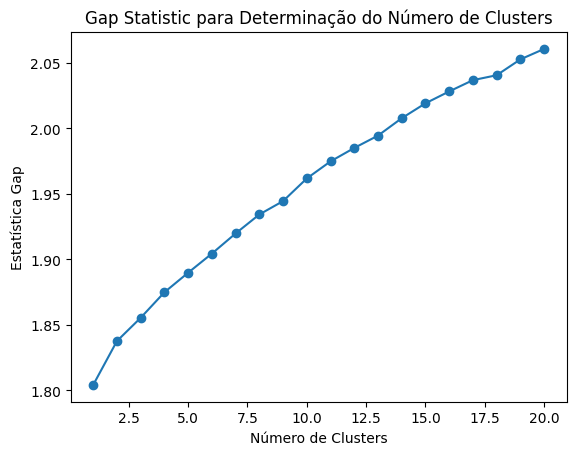

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import random

def calculate_gap_statistic(data, refs=None, nrefs=20, max_clusters=10):
    shape = data.shape
    if refs is None:
        tops = data.max(axis=0)
        bottoms = data.min(axis=0)
        dists = np.diag(tops - bottoms)
        rands = np.random.random_sample(size=(nrefs, shape[0], shape[1]))
        refs = rands @ dists + bottoms

    gaps = np.zeros((max_clusters,))
    results = []
    for k in range(1, max_clusters+1):
        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        disp = km.inertia_
        refdisps = np.zeros((refs.shape[0],))
        for i in range(refs.shape[0]):
            km.fit(refs[i])
            refdisps[i] = km.inertia_
        gap = np.log(np.mean(refdisps)) - np.log(disp)
        gaps[k-1] = gap
        results.append({'clusterCount': k, 'gap': gap})

    resultsdf = pd.DataFrame(results)
    return gaps, resultsdf

# Preparar os dados
num_neighbors = 50
neighbors = NearestNeighbors(n_neighbors=num_neighbors).fit(protein_embeddings)
distances, indices = neighbors.kneighbors(protein_embeddings[pain_protein_indices])
unique_indices = np.unique(indices.flatten())
selected_embeddings = protein_embeddings[unique_indices]
similarity_matrix = cosine_similarity(selected_embeddings)

# Aplicar a clusterização hierárquica usando o método de linkage escolhido
Z = linkage(similarity_matrix, method='complete')

# Calcular o Gap Statistic
max_clusters = 20
gaps, resultsdf = calculate_gap_statistic(selected_embeddings, max_clusters=max_clusters)

# Plotar os resultados
plt.plot(range(1, max_clusters+1), gaps, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Estatística Gap')
plt.title('Gap Statistic para Determinação do Número de Clusters')
plt.show()


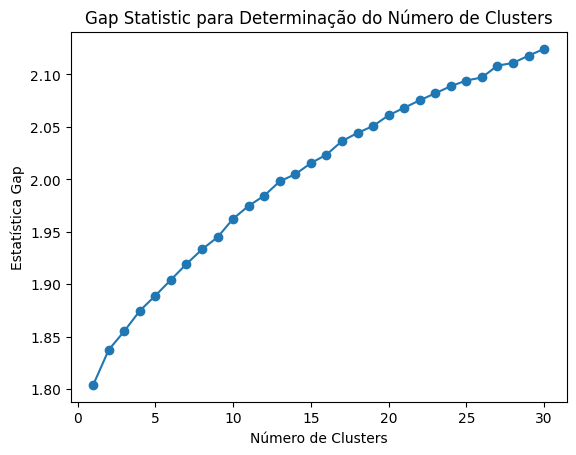

In [ ]:
# Calcular o Gap Statistic
max_clusters = 30
gaps, resultsdf = calculate_gap_statistic(selected_embeddings, max_clusters=max_clusters)

# Plotar os resultados
plt.plot(range(1, max_clusters+1), gaps, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Estatística Gap')
plt.title('Gap Statistic para Determinação do Número de Clusters')
plt.show()

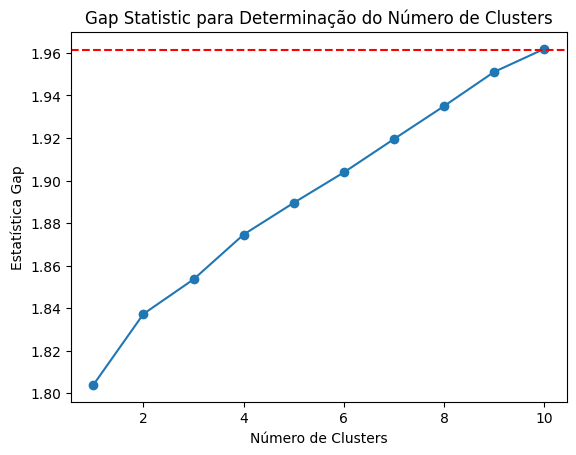

Número ótimo de clusters pelo método 1-SE: 10


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_gap_statistic(data, refs=None, nrefs=20, max_clusters=10):
    shape = data.shape
    if refs is None:
        tops = data.max(axis=0)
        bottoms = data.min(axis=0)
        dists = np.diag(tops - bottoms)
        rands = np.random.random_sample(size=(nrefs, shape[0], shape[1]))
        refs = rands @ dists + bottoms

    gaps = np.zeros((max_clusters,))
    gap_std_err = np.zeros((max_clusters,))
    results = []
    for k in range(1, max_clusters+1):
        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        disp = km.inertia_
        refdisps = np.zeros((refs.shape[0],))
        for i in range(refs.shape[0]):
            km.fit(refs[i])
            refdisps[i] = km.inertia_
        gap = np.log(np.mean(refdisps)) - np.log(disp)
        gap_std_err[k-1] = np.std(np.log(refdisps)) / np.sqrt(nrefs)
        gaps[k-1] = gap
        results.append({'clusterCount': k, 'gap': gap, 'gap_std_err': gap_std_err[k-1]})

    resultsdf = pd.DataFrame(results)
    return gaps, gap_std_err, resultsdf



# Calcular a Estatística Gap e o Erro Padrão
max_clusters = 100
gaps, gap_std_err, resultsdf = calculate_gap_statistic(selected_embeddings, max_clusters=max_clusters)

# Método 1-SE
gap_max = gaps.max()
gap_max_index = gaps.argmax()
threshold = gap_max - gap_std_err[gap_max_index]
optimal_clusters_1se = next(i for i, gap in enumerate(gaps) if gap >= threshold) + 1

# Plotar os resultados
plt.plot(range(1, max_clusters+1), gaps, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Estatística Gap')
plt.title('Gap Statistic para Determinação do Número de Clusters')
#plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

print(f"Número ótimo de clusters pelo método 1-SE: {optimal_clusters_1se}")


<ipython-input-19-c319f8ea0787>:58: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, max_clusters+1), gaps, yerr=gap_std_err, fmt='o', color=blue_color, ecolor='black', capsize=10, marker='o')


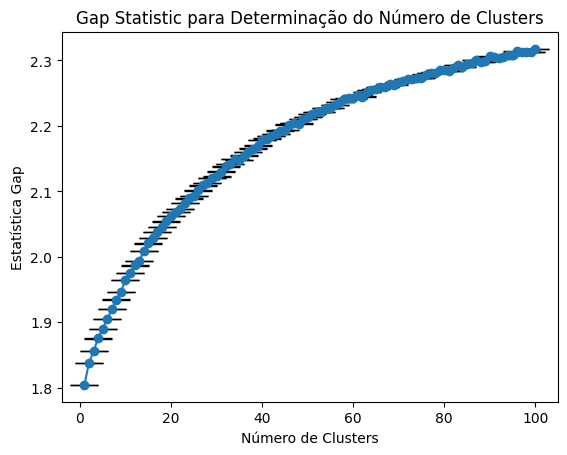

Número ótimo de clusters pelo método 1-SE: 100
Número ótimo de clusters pelo método FirstSEmax: 100


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import pandas as pd

def calculate_gap_statistic(data, refs=None, nrefs=20, max_clusters=10):
    shape = data.shape
    if refs is None:
        tops = data.max(axis=0)
        bottoms = data.min(axis=0)
        dists = np.diag(tops - bottoms)
        rands = np.random.random_sample(size=(nrefs, shape[0], shape[1]))
        refs = rands @ dists + bottoms

    gaps = np.zeros((max_clusters,))
    gap_std_err = np.zeros((max_clusters,))
    results = []
    for k in range(1, max_clusters+1):
        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        disp = km.inertia_
        refdisps = np.zeros((refs.shape[0],))
        for i in range(refs.shape[0]):
            km.fit(refs[i])
            refdisps[i] = km.inertia_
        gap = np.log(np.mean(refdisps)) - np.log(disp)
        gap_std_err[k-1] = np.std(np.log(refdisps)) / np.sqrt(nrefs)
        gaps[k-1] = gap
        results.append({'clusterCount': k, 'gap': gap, 'gap_std_err': gap_std_err[k-1]})

    resultsdf = pd.DataFrame(results)
    return gaps, gap_std_err, resultsdf



# Calcular a Estatística Gap e o Erro Padrão
max_clusters = 100  # Aumentar o número máximo de clusters para visualização melhorada
gaps, gap_std_err, resultsdf = calculate_gap_statistic(selected_embeddings, max_clusters=max_clusters)

# Método 1-SE
gap_max = gaps.max()
gap_max_index = gaps.argmax()
threshold = gap_max - gap_std_err[gap_max_index]
optimal_clusters_1se = next(i for i, gap in enumerate(gaps) if gap >= threshold) + 1

# Método FirstSEmax
optimal_clusters_firstsemax = next(i for i, gap in enumerate(gaps) if gap >= (gap_max - gap_std_err[gap_max_index])) + 1


# Definir a cor azul da tabela TABLEAU_COLORS
tableau_colors = list(mcolors.TABLEAU_COLORS.values())
blue_color = tableau_colors[0]
# Plotar os resultados com barras de erro
plt.errorbar(range(1, max_clusters+1), gaps, yerr=gap_std_err, fmt='o', color=blue_color, ecolor='black', capsize=10, marker='o')
plt.plot(range(1, max_clusters+1), gaps, color=blue_color)  # Adicionar linha conectando os pontos
plt.xlabel('Número de Clusters')
plt.ylabel('Estatística Gap')
plt.title('Gap Statistic para Determinação do Número de Clusters')
#plt.axhline(y=threshold, color='r', linestyle='--')
#plt.grid(True)
plt.show()

print(f"Número ótimo de clusters pelo método 1-SE: {optimal_clusters_1se}")
print(f"Número ótimo de clusters pelo método FirstSEmax: {optimal_clusters_firstsemax}")


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd

def calculate_gap_statistic(data, refs=None, nrefs=20, max_clusters=10):
    shape = data.shape
    if refs is None:
        tops = data.max(axis=0)
        bottoms = data.min(axis=0)
        dists = np.diag(tops - bottoms)
        rands = np.random.random_sample(size=(nrefs, shape[0], shape[1]))
        refs = rands @ dists + bottoms

    gaps = np.zeros((max_clusters,))
    gap_std_err = np.zeros((max_clusters,))
    results = []
    for k in range(1, max_clusters+1):
        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        disp = km.inertia_
        refdisps = np.zeros((refs.shape[0],))
        for i in range(refs.shape[0]):
            km.fit(refs[i])
            refdisps[i] = km.inertia_
        gap = np.log(np.mean(refdisps)) - np.log(disp)
        gap_std_err[k-1] = np.std(np.log(refdisps)) / np.sqrt(nrefs)
        gaps[k-1] = gap
        results.append({'clusterCount': k, 'gap': gap, 'gap_std_err': gap_std_err[k-1]})

    resultsdf = pd.DataFrame(results)
    return gaps, gap_std_err, resultsdf

# Preparar os dados
num_neighbors = 100
neighbors = NearestNeighbors(n_neighbors=num_neighbors).fit(protein_embeddings)
distances, indices = neighbors.kneighbors(protein_embeddings[pain_protein_indices])
unique_indices = np.unique(indices.flatten())
selected_embeddings = protein_embeddings[unique_indices]

# Aplicar DBSCAN para identificar regiões densas
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(selected_embeddings)

# Contar o número de clusters (excluindo ruído)
num_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Número de clusters identificados pelo DBSCAN: {num_dbscan_clusters}")

# Filtrar embeddings dos clusters identificados pelo DBSCAN (excluindo ruído)
non_noise_indices = dbscan_labels != -1
dbscan_embeddings = selected_embeddings[non_noise_indices]

# Calcular a matriz de similaridade do cosseno
similarity_matrix = cosine_similarity(dbscan_embeddings)

# Aplicar a clusterização hierárquica usando o método de linkage adequado
Z = linkage(similarity_matrix, method='complete')

# Calcular a Estatística Gap e o Erro Padrão
max_clusters = 200
gaps, gap_std_err, resultsdf = calculate_gap_statistic(dbscan_embeddings, max_clusters=max_clusters)

# Método 1-SE
gap_max = gaps.max()
gap_max_index = gaps.argmax()
threshold = gap_max - gap_std_err[gap_max_index]
optimal_clusters_1se = next(i for i, gap in enumerate(gaps) if gap >= threshold) + 1

# Método FirstSEmax
optimal_clusters_firstsemax = next(i for i, gap in enumerate(gaps) if gap >= (gap_max - gap_std_err[gap_max_index])) + 1

# Definir a cor azul da tabela TABLEAU_COLORS
tableau_colors = list(mcolors.TABLEAU_COLORS.values())
blue_color = tableau_colors[0]

# Plotar os resultados com barras de erro
plt.figure(figsize=(120, 80))  # Aumenta o tamanho da figura
plt.errorbar(range(1, max_clusters+1), gaps, yerr=gap_std_err, fmt='o', color=blue_color, ecolor='red', capsize=5)
plt.plot(range(1, max_clusters+1), gaps, color=blue_color)  # Adicionar linha conectando os pontos em azul
plt.xlabel('Número de Clusters')
plt.ylabel('Estatística Gap')
plt.title('Gap Statistic para Determinação do Número de Clusters')
#plt.axhline(y=threshold, color='r', linestyle='--')
#plt.grid(True)
plt.show()

print(f"Número ótimo de clusters pelo método 1-SE: {optimal_clusters_1se}")
print(f"Número ótimo de clusters pelo método FirstSEmax: {optimal_clusters_firstsemax}")

# Plotar o dendrograma dos embeddings filtrados pelo DBSCAN
plt.figure(figsize=(100, 70))
dendrogram(Z, truncate_mode='level', p=20)
plt.title('Dendrograma da Clusterização Hierárquica em Torno das Seeds (Proteínas da Dor)')
plt.xlabel('Índice da Proteína')
plt.ylabel('Distância')
plt.show()


In [ ]:
import pickle
# Salvar resultados da Estatística Gap em um arquivo CSV
resultsdf.to_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/gap_statistic_results.csv', index=False)

# Salvar resultados da clusterização hierárquica em um arquivo pickle
with open('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/hierarchical_clustering_results.pkl', 'wb') as f:
    pickle.dump(Z, f)

print("Resultados salvos com sucesso.")

Resultados salvos com sucesso.


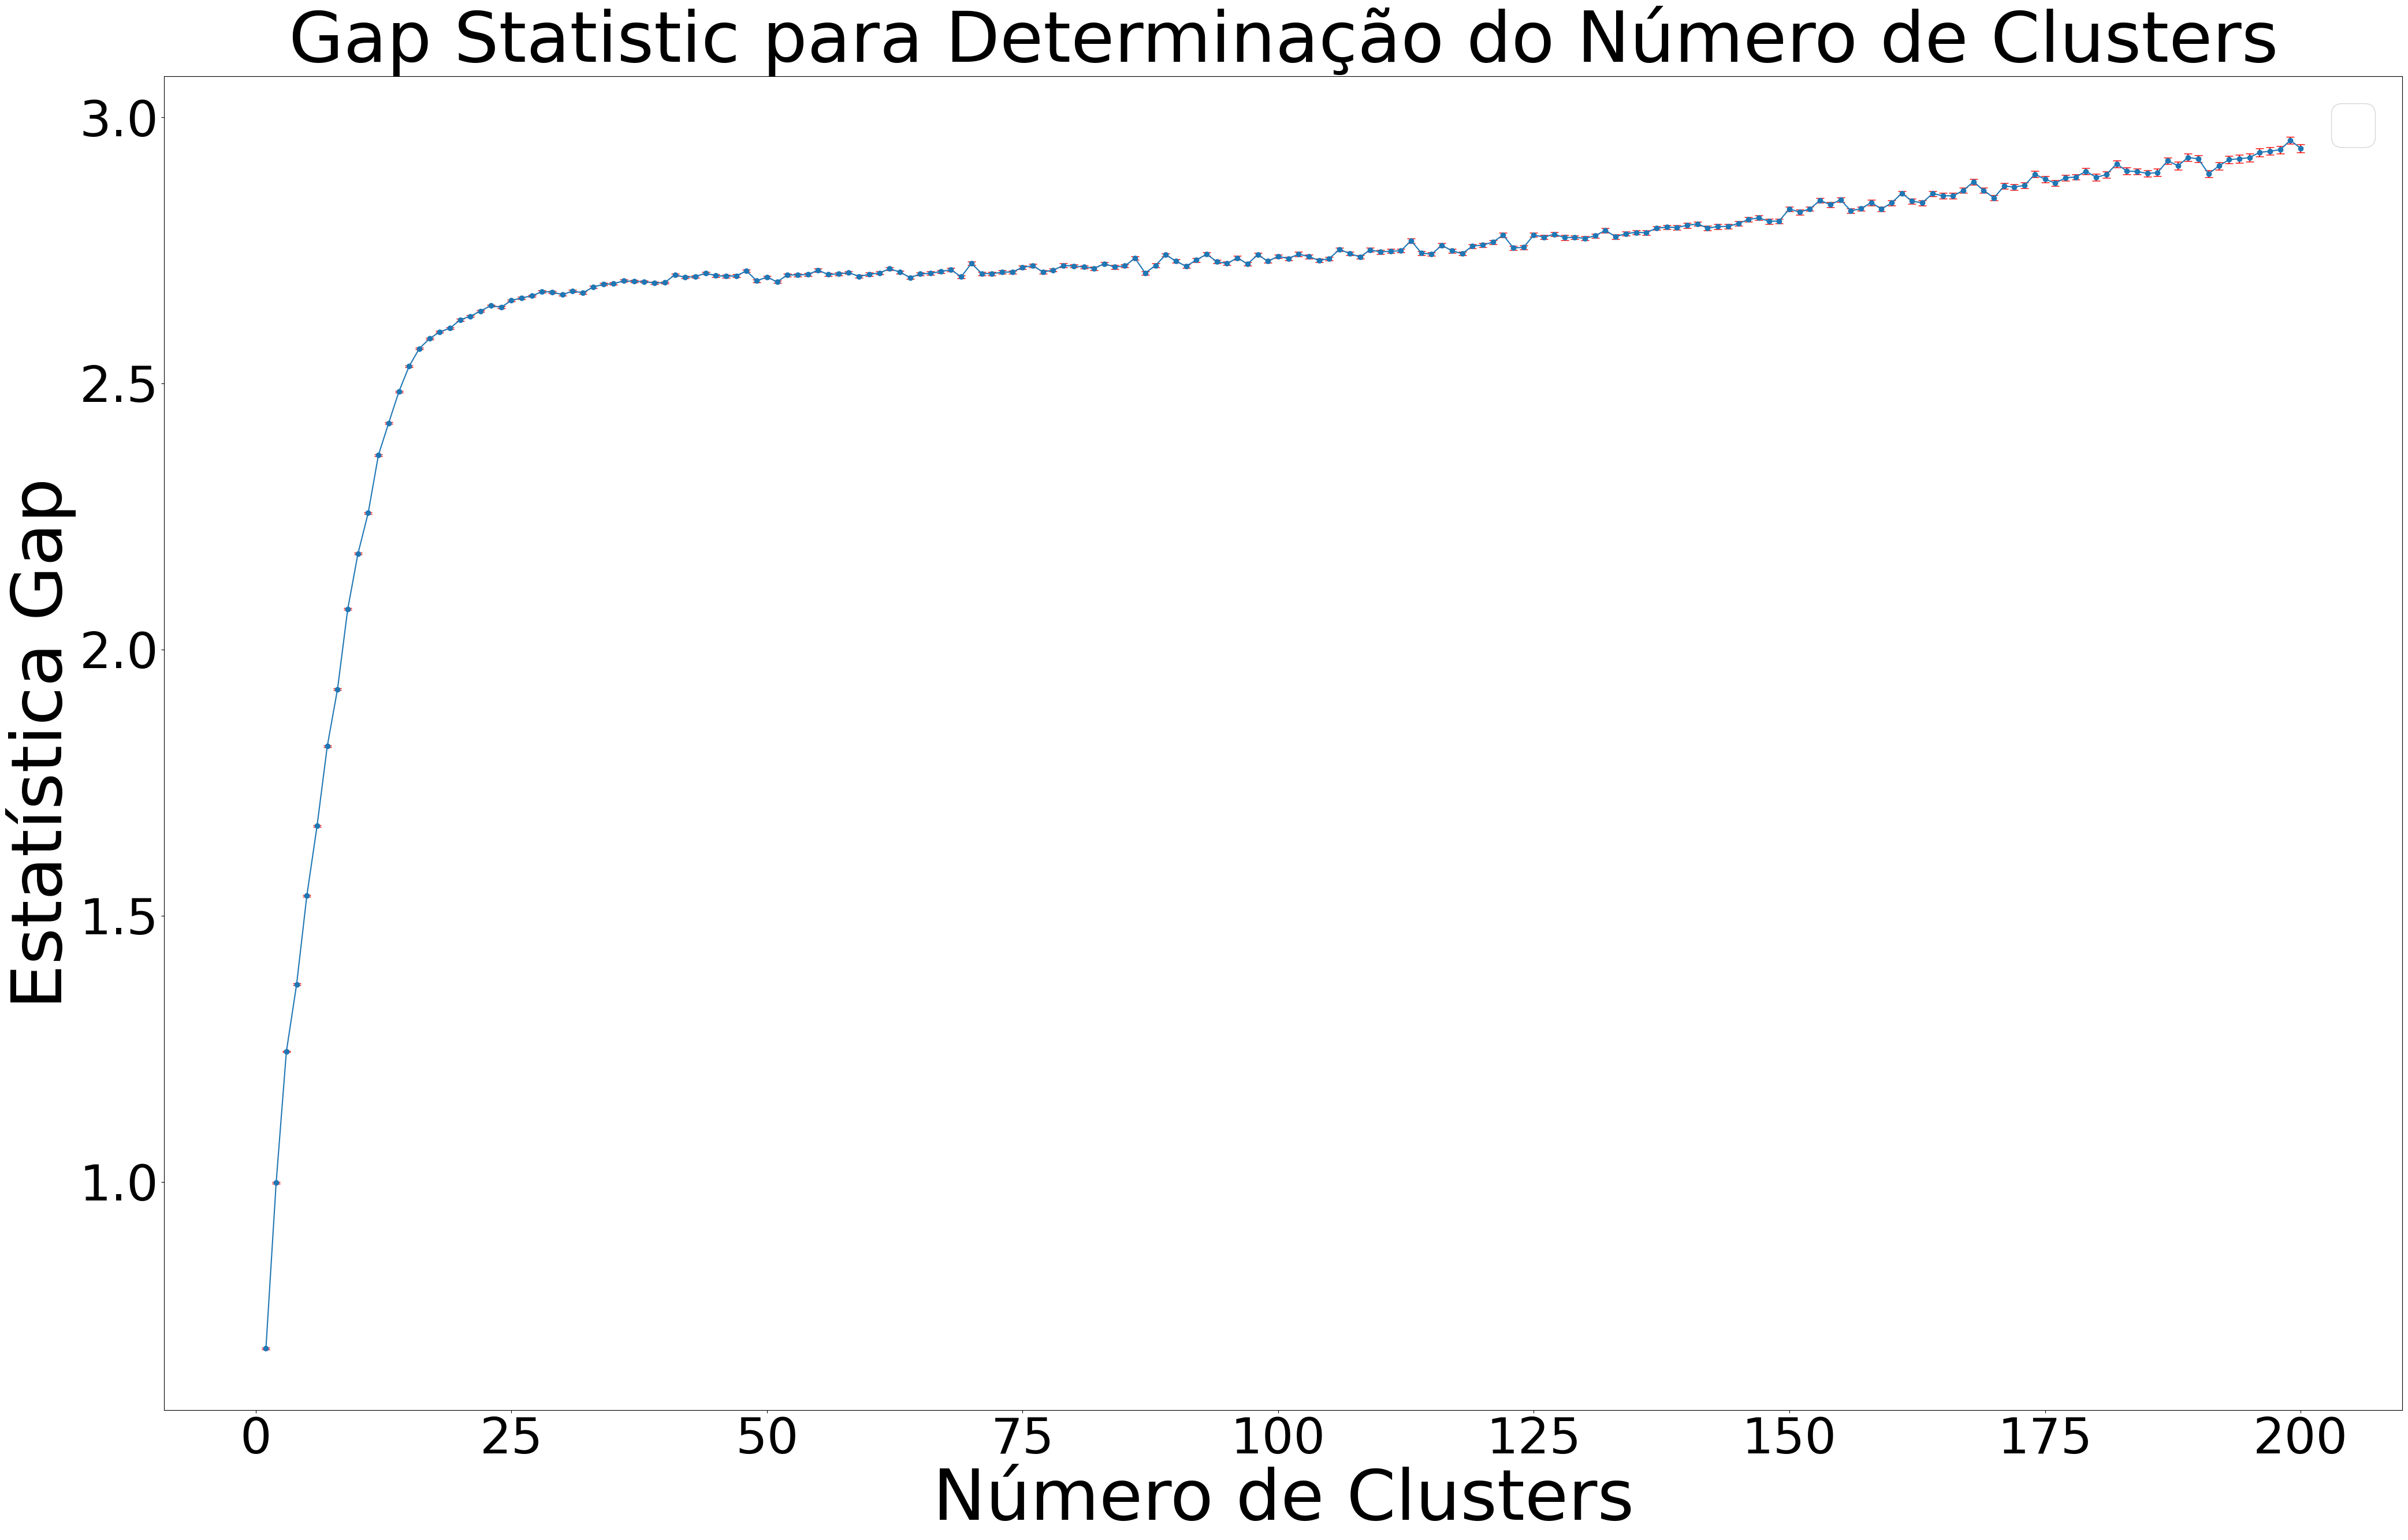

Número ótimo de clusters pelo método 1-SE: 199
Número ótimo de clusters pelo método FirstSEmax: 199
Número de clusters gerados pelo clustering hierárquico antes do corte: 38


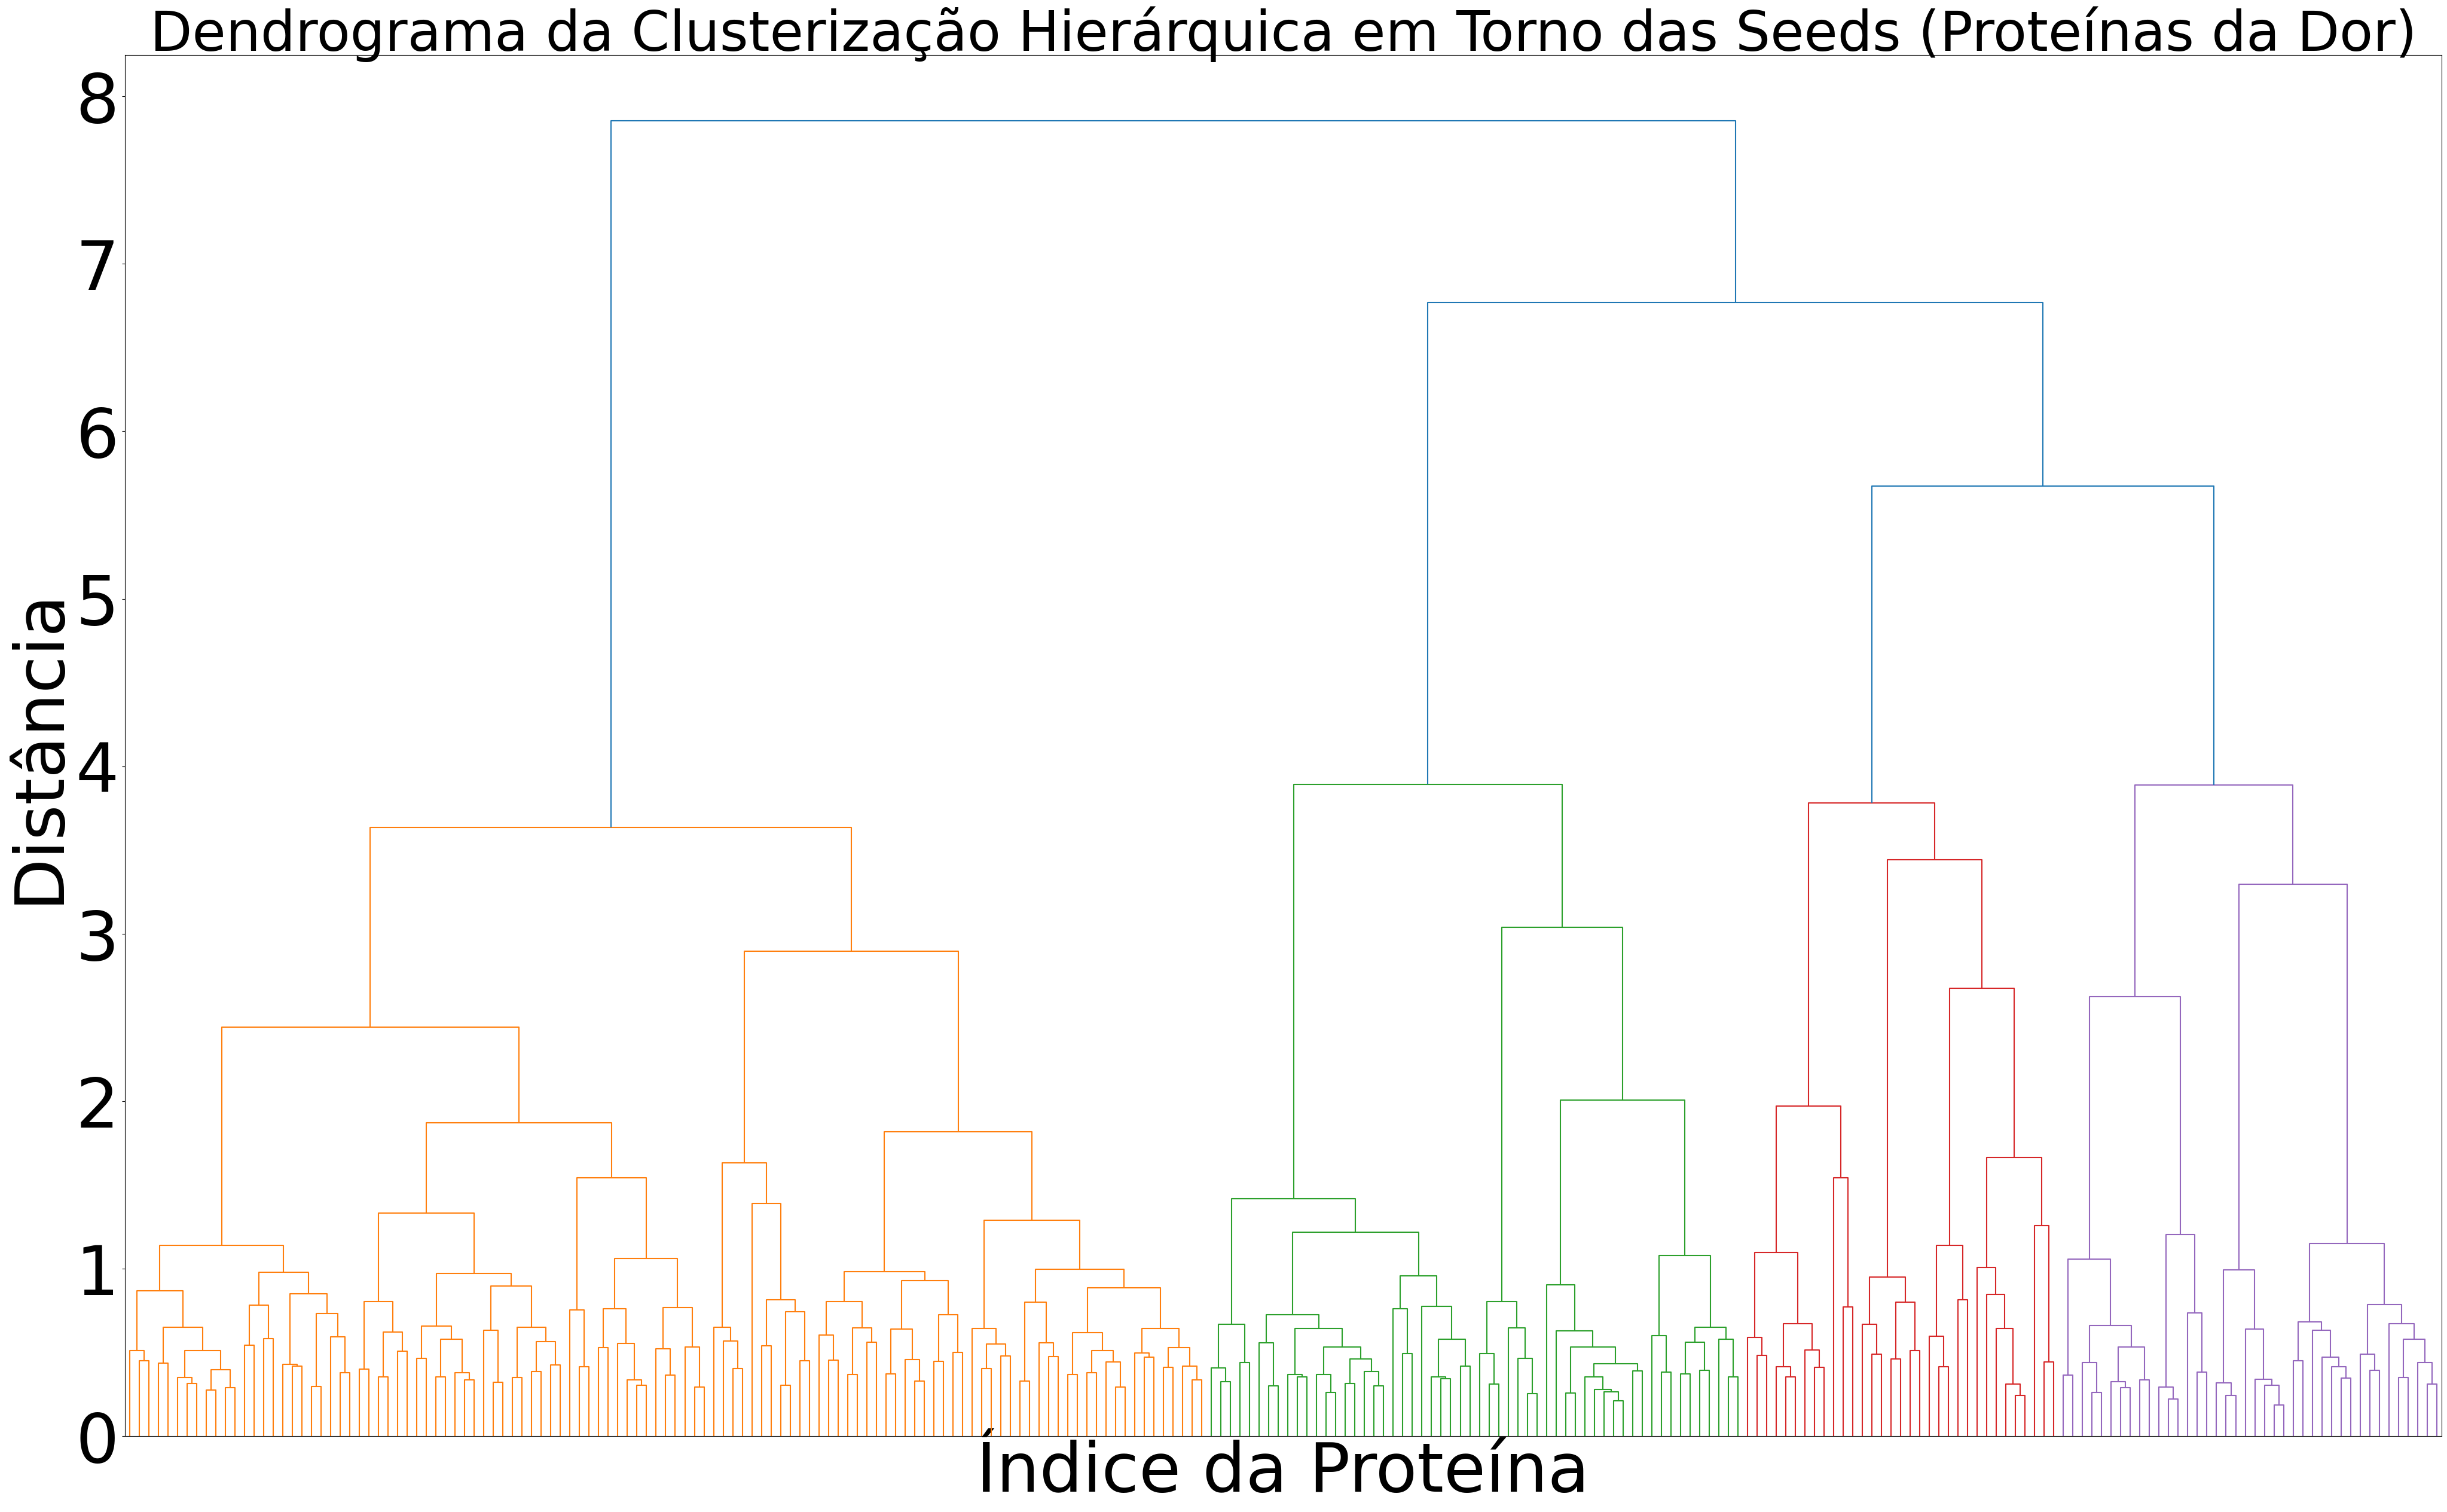

In [ ]:
# Definir a cor azul da tabela TABLEAU_COLORS
tableau_colors = list(mcolors.TABLEAU_COLORS.values())
blue_color = tableau_colors[0]

# Plotar os resultados com barras de erro
plt.figure(figsize=(50, 30))  # Aumenta o tamanho da figura
plt.errorbar(range(1, max_clusters+1), gaps, yerr=gap_std_err, fmt='o', color=blue_color, ecolor='red', capsize=5)
plt.plot(range(1, max_clusters+1), gaps, color=blue_color)  # Adicionar linha conectando os pontos em azul
plt.xlabel('Número de Clusters', fontsize=88)
plt.ylabel('Estatística Gap', fontsize=88)
plt.title('Gap Statistic para Determinação do Número de Clusters', fontsize=88)
plt.legend(fontsize=68)
plt.xticks(fontsize=62)
plt.yticks(fontsize=62)
#plt.axhline(y=threshold, color='r', linestyle='--')
#plt.grid(True)
plt.show()

print(f"Número ótimo de clusters pelo método 1-SE: {optimal_clusters_1se}")
print(f"Número ótimo de clusters pelo método FirstSEmax: {optimal_clusters_firstsemax}")

# Cortar o dendrograma usando o número ótimo de clusters
# optimal_clusters = optimal_clusters_1se  # ou optimal_clusters_firstsemax, dependendo de sua escolha
# hierarchical_labels = fcluster(Z, optimal_clusters, criterion='maxclust')

initial_hierarchical_labels = fcluster(Z, t=1.0, criterion='distance')
num_initial_clusters_hierarchical = len(set(initial_hierarchical_labels))
print(f"Número de clusters gerados pelo clustering hierárquico antes do corte: {num_initial_clusters_hierarchical}")


# Plotar o dendrograma dos embeddings filtrados pelo DBSCAN
plt.figure(figsize=(50, 30))
dendrogram(Z, truncate_mode='level', p=20)
plt.title('Dendrograma da Clusterização Hierárquica em Torno das Seeds (Proteínas da Dor)', fontsize=66)
plt.xlabel('Índice da Proteína',fontsize=82)
plt.ylabel('Distância',  fontsize=82)
plt.xticks([],fontsize=82)
plt.yticks(fontsize=82)
plt.show()


In [ ]:
# Criar um DataFrame para os dados de proteínas e rótulos de DBSCAN
df = pd.DataFrame({
    'protein_id': unique_indices.astype(int),
    'dbscan_label': dbscan_labels
})

# Verificar quais genes da lista estão nos clusters identificados pelo DBSCAN
genes_in_clusters = df[df['protein_id'].isin(pain_protein_indices)]
genes_in_clusters

,protein_id,dbscan_label
6,9,-1
17,21,-1
18,22,-1
22,26,0
103,109,-1
...,...,...
11512,26579,-1
11562,26842,-1
11682,27334,-1
11740,27571,-1


In [ ]:
genes_in_clusters['dbscan_label'].value_counts()

dbscan_label
-1     415
 0       1
 14      1
 9       1
Name: count, dtype: int64

In [ ]:
genes_in_clusters.to_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/genes_in_clusters_dbscan.csv', index=False)

In [ ]:
unique_indices

array([    1,     2,     3, ..., 28316, 28317, 28318])

In [ ]:
initial_hierarchical_labels = fcluster(Z, t=38, criterion='maxclust')

filtered_indices = unique_indices[non_noise_indices]
# Criar um DataFrame para os dados de proteínas e rótulos de cluster hierárquico
df_hie = pd.DataFrame({
    'protein_id': filtered_indices.astype(int),  # Certifique-se de que os IDs das proteínas sejam strings
    'hierarchical_label': initial_hierarchical_labels
})

# Verificar quais genes da lista estão nos clusters identificados pela clusterização hierárquica
genes_in_clusters_hie = df_hie[df_hie['protein_id'].isin(pain_protein_indices)]
genes_in_clusters_hie

,protein_id,hierarchical_label
6,26,28
204,1998,19
240,4579,13


In [ ]:
# Verificar quais genes da lista estão presentes nos dados originais
genes_in_original = df[df['protein_id'].isin(pain_protein_indices)]['protein_id'].tolist()

# Criar um DataFrame para os dados filtrados
df_filtered = pd.DataFrame({
    'protein_id': filtered_indices.astype(int),  # Certifique-se de que os IDs das proteínas sejam string
    'dbscan_label': dbscan_labels[non_noise_indices]
})

# Verificar quais genes da lista estão presentes nos dados filtrados
genes_in_filtered = df_filtered[df_filtered['protein_id'].isin(pain_protein_indices)]['protein_id'].tolist()

# Encontrar os genes que foram excluídos ao remover o ruído
excluded_genes = list(set(genes_in_original) - set(genes_in_filtered))

In [ ]:
len(excluded_genes)

415

Classificação com XGBoost

In [ ]:
#instalar biblioteca para abrir arquivo zip que tem a classe 1
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00


In [ ]:
# import pandas as pd
# #abrindo o df que tem a classe 1
# # Caminho para o arquivo Parquet
# file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/df_to_pred_pain_compressed.parquet'

# # Lendo o arquivo Parquet com Fastparquet
# resultado_final = pd.read_parquet(file_path, engine='fastparquet')

# # Verificando o DataFrame carregado
# resultado_final


,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
0,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.900290,-0.794334,-0.615595,-1.068716,-0.147269,-0.362027,0.651723,0.355320,-0.262925,0
1,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.004571,-0.265790,-0.262614,0.196438,0.046643,-0.310473,-0.048755,0.042908,0.316755,0
2,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.097300,-0.127830,-0.258367,0.064626,0.032432,-0.097965,0.032836,0.002280,0.268000,0
3,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.102032,-0.173446,-0.216044,0.024354,0.053985,-0.131721,0.063175,-0.000774,0.264881,0
4,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.568055,-0.967971,-0.342538,-0.770120,0.255916,-0.237383,0.666473,0.684097,-0.397402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11839009,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.138705,0.051245,-0.150101,0.241715,0.162543,0.151374,-0.169020,0.177068,0.234927,0
11839010,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.211048,0.019791,-0.316019,0.266554,-0.095985,0.185804,-0.286799,0.294022,0.066242,0
11839011,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.322283,-0.337798,0.002265,0.309127,-0.504140,-0.190868,-0.261495,0.069011,0.470691,0
11839012,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.186426,-0.257149,-0.057586,0.113891,0.174338,-0.159112,-0.014809,-0.868491,0.126613,0


In [ ]:
# resultado_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11839014 entries, 0 to 11839013
Columns: 103 entries, 0_x to classe
dtypes: float64(100), int64(1), object(2)
memory usage: 9.1+ GB


In [ ]:
# import pandas as pd
# import numpy as np


# # Filtrar os pares da classe 1
# df_class_1 = resultado_final[resultado_final['classe'] == 1]

# # Remover pares redundantes do tipo 'A-A'
# df_class_1 = df_class_1[df_class_1['0_x'] != df_class_1['0_y']]



# import pandas as pd
# import pyarrow.parquet as pq
# import pyarrow as pa


# # Convertendo o DataFrame para uma tabela PyArrow
# table = pa.Table.from_pandas(df_class_1)

# # Salvando o DataFrame como Parquet com compressão GZIP
# pq.write_table(table, '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/df_to_pred_pain_class_1_compressed.parquet', compression='gzip')


In [ ]:
# df_class_1

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
21,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.103689,-0.204262,-0.174374,0.032697,-0.003472,-0.035710,0.109866,-0.112433,0.272488,1
22,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.046425,-0.186696,-0.185122,-0.003194,-0.089391,-0.027268,0.067447,-0.075070,0.274078,1
26,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.080267,-0.269812,-0.224572,0.010047,0.087696,-0.133946,0.066011,0.101055,0.176984,1
109,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.164042,-0.410829,-0.457562,0.026103,0.067956,-0.098207,0.142538,0.106346,0.127475,1
126,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,-0.239678,-0.652778,-0.119411,0.020511,-0.214080,-0.115789,-0.527527,0.270148,0.131928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836579,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
11837270,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.145447,-0.388592,-0.478274,-0.237420,-0.028520,-0.135289,0.038896,0.252479,0.282313,1
11837533,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.232203,-0.043796,-0.300451,0.091523,-0.053266,0.247925,0.162769,-0.075042,0.398548,1
11838025,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.107199,-0.466770,-0.026936,0.013491,-0.352839,0.063465,-0.303787,0.102998,0.637826,1


## criar df combined que o df para o treino

1.   Item de lista
2.   Item de lista



In [ ]:
#instalar biblioteca para abrir arquivo zip que tem a classe 1
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
#abrindo df da classe 1, abri novamento pois troquei a ram de execução
# Caminho para o arquivo Parquet
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/df_to_pred_pain_class_1_compressed.parquet'

# Lendo o arquivo Parquet com Fastparquet
df_class_1 = pd.read_parquet(file_path, engine='fastparquet')

In [ ]:
df_class_1

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
21,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.103689,-0.204262,-0.174374,0.032697,-0.003472,-0.035710,0.109866,-0.112433,0.272488,1
22,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.046425,-0.186696,-0.185122,-0.003194,-0.089391,-0.027268,0.067447,-0.075070,0.274078,1
26,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.080267,-0.269812,-0.224572,0.010047,0.087696,-0.133946,0.066011,0.101055,0.176984,1
109,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,0.164042,-0.410829,-0.457562,0.026103,0.067956,-0.098207,0.142538,0.106346,0.127475,1
126,2908,-0.227945,0.357399,-0.244613,-0.448850,0.014991,-0.341876,-0.495251,-0.434568,-0.041171,...,-0.239678,-0.652778,-0.119411,0.020511,-0.214080,-0.115789,-0.527527,0.270148,0.131928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836579,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
11837270,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,0.145447,-0.388592,-0.478274,-0.237420,-0.028520,-0.135289,0.038896,0.252479,0.282313,1
11837533,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.232203,-0.043796,-0.300451,0.091523,-0.053266,0.247925,0.162769,-0.075042,0.398548,1
11838025,150759,-0.024692,0.049590,0.133204,0.192165,0.108850,0.148288,0.113785,0.465705,-0.115110,...,-0.107199,-0.466770,-0.026936,0.013491,-0.352839,0.063465,-0.303787,0.102998,0.637826,1


In [ ]:
import pandas as pd


# Step 1: Obter todos os pares da classe 1
class_1_pairs = set(zip(df_class_1['0_x'], df_class_1['0_y']))

# Step 2: Create a Set to Track Unique Pairs and Reverse Pairs
unique_pairs = set()
for pair in class_1_pairs:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.add(pair)

# Step 3: Create a DataFrame of Unique Pairs
filtered_class_1_pairs = pd.DataFrame(list(unique_pairs), columns=['0_x', '0_y'])

# Step 4: Merge with the original df_class_1 to get all other columns
filtered_class_1 = pd.merge(filtered_class_1_pairs, df_class_1, on=['0_x', '0_y'])
df_class_1 = filtered_class_1
df_class_1

,0_x,0_y,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
0,359,4052,0.229744,-0.145892,-0.467810,0.294429,0.173089,0.251314,-0.195348,0.248470,...,-0.085282,-0.558535,-0.292554,0.259319,-0.157124,0.331364,0.023952,-0.016260,0.544086,1
1,7364,386724,0.172635,-0.359099,-0.136347,-0.257053,-0.839659,0.676452,0.388749,0.579178,...,-0.520730,-0.202240,-0.347531,-0.079843,0.434286,-0.103309,0.096440,0.536762,0.597158,1
2,10203,497258,0.345711,0.191115,-0.171831,0.014530,-0.432704,-0.161022,-0.263161,-0.891923,...,0.160281,-0.486679,0.076959,0.016536,-0.170650,-0.385519,-0.010951,-0.287452,0.499016,1
3,57419,145581,-0.056860,-0.203674,-0.399705,0.422363,-0.682892,0.761863,-0.126115,0.029416,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
4,7097,3062,-0.373157,0.086090,-0.258872,-0.222608,0.008209,-0.148437,-0.242177,-0.046607,...,-0.654197,-0.637172,0.162118,0.262044,0.384166,0.081225,-0.119329,-0.304046,-0.166391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87148,144347,51196,0.292086,0.078031,-0.015471,0.222745,0.138754,0.042254,-0.118161,0.360240,...,0.273258,-0.086802,-0.117262,-0.020930,-0.160267,-0.207721,-0.005775,-0.226455,0.174606,1
87149,814,57674,0.193579,-0.163947,0.035920,-0.091940,-0.069819,0.118849,0.034139,-0.054555,...,-0.041771,-0.419688,-0.058645,0.066707,0.073353,-0.109578,-0.142269,-0.091143,0.160684,1
87150,4035,23245,-0.110058,-0.060995,-0.171293,-0.163494,-0.043630,-0.110449,-0.077785,-0.041841,...,0.025665,0.081192,-0.096940,-0.211683,0.061634,-0.039106,-0.187181,0.191080,0.514292,1
87151,4914,7223,0.100657,0.137111,-0.085437,0.072115,0.010098,0.059283,0.020738,-0.100958,...,0.852230,0.322852,-0.494237,-0.537795,0.207393,-0.520101,0.657607,-0.119584,0.245188,1


In [ ]:

import numpy as np
import pandas as pd
import networkx as nx
import random

# Carregar embeddings dos arquivos
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Criar um dicionário que mapeia IDs de proteínas para seus índices em protein_embeddings
protein_id_to_index = {protein_ids[i]: i for i in range(len(protein_ids))}

# Carregar o grafo e transformar em lista de arestas
G = nx.read_edgelist("/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/largest_component_biogrid_2023_sem_pesos.edgelist")
lista_de_arestas = list(G.edges())

# Filtrar a lista de arestas para garantir que os IDs estejam no dicionário de mapeamento
filtered_edges = [edge for edge in lista_de_arestas if edge[0] in protein_id_to_index and edge[1] in protein_id_to_index]

# Obter todos os pares da classe 1
class_1_pairs = set(zip(df_class_1['0_x'], df_class_1['0_y']))
class_1_pairs_inverted = set((y, x) for x, y in class_1_pairs)

# Criar um conjunto de todas as arestas na edge list
all_edges = set(filtered_edges)

# Remover os pares da classe 1 (e seus inversos) da edge list
class_0_edges = all_edges - class_1_pairs - class_1_pairs_inverted

# Amostrar aleatoriamente 174.306 pares da classe 0
class_0_pairs_sampled = random.sample(class_0_edges, len(class_1_pairs))

# Criar DataFrame da classe 0
df_class_0 = pd.DataFrame(class_0_pairs_sampled, columns=['0_x', '0_y'])




Carregado 28323 embeddings com 50 dimensões.


In [ ]:
# Adicionar colunas de embeddings para classe 0 de forma eficiente
embeddings_0_x = []
embeddings_0_y = []

for pair in class_0_pairs_sampled:
    embeddings_0_x.append(protein_embeddings[protein_id_to_index[pair[0]]])
    embeddings_0_y.append(protein_embeddings[protein_id_to_index[pair[1]]])

embeddings_0_x = np.array(embeddings_0_x)
embeddings_0_y = np.array(embeddings_0_y)

# Criar DataFrame da classe 0
df_class_0 = pd.DataFrame({
    '0_x': [pair[0] for pair in class_0_pairs_sampled],
    '0_y': [pair[1] for pair in class_0_pairs_sampled]
})

# Concatenar embeddings para a classe 0
embeddings_0_df = pd.DataFrame(
    np.hstack([embeddings_0_x, embeddings_0_y]),
    columns=[f'{i+1}_x' for i in range(embeddings_0_x.shape[1])] + [f'{i+1}_y' for i in range(embeddings_0_y.shape[1])]
)

# Adicionar a coluna de classe
df_class_0 = pd.concat([df_class_0.reset_index(drop=True), embeddings_0_df.reset_index(drop=True)], axis=1)
df_class_0['classe'] = 0

# Garantir que os índices de df_class_1 sejam únicos e reiniciar o índice
df_class_1 = df_class_1.reset_index(drop=True)

# # Garantir que as colunas dos DataFrames sejam as mesmas antes de concatenar
common_columns = df_class_1.columns.intersection(df_class_0.columns)
df_class_1 = df_class_1[common_columns]
df_class_0 = df_class_0[common_columns]

In [ ]:
list_col_df1 = df_class_1.columns.tolist()
list_col_df0 = df_class_0.columns.tolist()

In [ ]:

# Convertendo listas para conjuntos
conjunto1 = set(list_col_df1)
conjunto2 = set(list_col_df0)

# Diferenças
diferenca1 = conjunto1 - conjunto2  # Elementos em lista1 que não estão em lista2
diferenca2 = conjunto2 - conjunto1  # Elementos em lista2 que não estão em lista1

# Unindo as diferenças
diferencas = diferenca1.union(diferenca2)

# Imprimindo os resultados
print(f"Elementos em lista1 que não estão em lista2: {diferenca1}")
print(f"Elementos em lista2 que não estão em lista1: {diferenca2}")
print(f"Elementos diferentes entre as duas listas: {diferencas}")


Elementos em lista1 que não estão em lista2: set()
Elementos em lista2 que não estão em lista1: set()
Elementos diferentes entre as duas listas: set()


In [ ]:
# Combinar os DataFrames de classe 1 e classe 0 corretamente
df_class_1 = df_class_1.reset_index(drop=True) # Reset index to ensure unique values
df_class_0 = df_class_0.reset_index(drop=True) # Reset index to ensure unique values

# Verificar se ainda existem índices duplicados
print("Índices duplicados em df_class_1:", df_class_1.index.duplicated().any())
print("Índices duplicados em df_class_0:", df_class_0.index.duplicated().any())

# Forçar índices únicos antes da concatenação
df_class_1 = df_class_1.loc[~df_class_1.index.duplicated(keep='first')]
df_class_0 = df_class_0.loc[~df_class_0.index.duplicated(keep='first')]

# Reset the index again after removing duplicates, just to be sure
df_class_1 = df_class_1.reset_index(drop=True)
df_class_0 = df_class_0.reset_index(drop=True)

df_combined = pd.concat([df_class_1, df_class_0], ignore_index=True)


Índices duplicados em df_class_1: False
Índices duplicados em df_class_0: False


In [ ]:
df_combined

,0_x,0_y,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
0,653,57804,0.067772,-0.092082,-0.592413,-0.119504,-0.247903,-0.310259,0.034833,0.231018,...,0.179703,-0.530346,-0.098702,0.064644,-0.244388,0.147604,-0.084851,-0.022734,0.260575,1
1,4524,150,-0.011096,-0.268637,-0.060895,-0.149952,-0.540272,0.114563,0.085317,-0.034332,...,0.333643,-0.318833,-0.677121,-0.003520,0.280462,-0.605855,-0.797844,0.024971,0.189840,1
2,83851,55833,-0.452904,0.067423,-0.439154,-0.116135,-0.249063,0.269788,0.262456,0.621961,...,0.027182,-0.049355,-0.241379,0.175282,-0.127515,-0.189146,0.377588,0.211985,0.399073,1
3,6335,140803,-0.498211,0.052214,-0.247042,-0.312517,-0.359719,0.630307,-0.073947,0.147684,...,0.194889,-0.533237,0.006199,0.409855,-0.487209,-0.186253,-0.186422,0.113833,-0.149106,1
4,1356,5795,0.622232,0.070861,-0.006622,0.222141,-0.387574,-0.279623,-0.212995,-0.067183,...,-0.245243,0.100183,-0.613062,0.015771,-0.071280,-0.481388,-0.188966,0.065923,0.050846,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174301,54915,8939,-0.053496,0.087333,-0.161170,-0.091401,0.475912,0.261293,-0.167493,0.179309,...,0.074009,-0.112255,-0.277201,0.169784,-0.004516,-0.019199,0.328891,0.242097,0.593412,0
174302,54793,3216,-0.050266,0.327262,-0.065246,-0.183096,0.168058,0.106020,0.104529,0.212222,...,0.068710,-0.038620,-0.268532,0.150925,-0.211521,0.080136,0.093303,0.114934,0.441024,0
174303,10902,6944,-0.177521,-0.140858,-0.418220,0.251697,-0.085422,0.398709,-0.245277,0.305850,...,0.081227,0.057519,0.126429,-0.205827,-0.460603,0.232531,0.007564,-0.217689,0.419769,0
174304,84823,124245,-0.133149,-0.092046,-0.120926,0.140772,-0.052967,0.056063,-0.058406,0.058168,...,0.025323,-0.183806,-0.286549,-0.171183,0.233298,0.038856,0.262562,-0.035339,0.404692,0


In [ ]:
# Reorganizando as colunas para mover '0_y' ao lado de '0_x'
df_combined = df_combined[['0_x', '0_y'] + [col for col in df_combined.columns if col not in ['0_x', '0_y']]]
df_combined

,0_x,0_y,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,classe
0,359,4052,0.229744,-0.145892,-0.467810,0.294429,0.173089,0.251314,-0.195348,0.248470,...,-0.085282,-0.558535,-0.292554,0.259319,-0.157124,0.331364,0.023952,-0.016260,0.544086,1
1,7364,386724,0.172635,-0.359099,-0.136347,-0.257053,-0.839659,0.676452,0.388749,0.579178,...,-0.520730,-0.202240,-0.347531,-0.079843,0.434286,-0.103309,0.096440,0.536762,0.597158,1
2,10203,497258,0.345711,0.191115,-0.171831,0.014530,-0.432704,-0.161022,-0.263161,-0.891923,...,0.160281,-0.486679,0.076959,0.016536,-0.170650,-0.385519,-0.010951,-0.287452,0.499016,1
3,57419,145581,-0.056860,-0.203674,-0.399705,0.422363,-0.682892,0.761863,-0.126115,0.029416,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
4,7097,3062,-0.373157,0.086090,-0.258872,-0.222608,0.008209,-0.148437,-0.242177,-0.046607,...,-0.654197,-0.637172,0.162118,0.262044,0.384166,0.081225,-0.119329,-0.304046,-0.166391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174301,4719,338872,-0.372214,-0.037197,-0.307473,0.320801,-0.093167,0.099319,0.080622,-0.156549,...,0.043758,-0.524071,-0.284566,0.127912,0.060188,0.564355,0.252153,0.261959,0.364484,0
174302,4609,64225,0.031637,0.165369,-0.159585,0.184160,-0.056359,0.033383,-0.167151,0.072863,...,-0.355839,-0.349512,-0.168503,0.124261,0.402184,0.070327,-0.043323,-0.195264,0.007852,0
174303,10134,7461,-0.257145,0.038250,-0.245239,0.000499,-0.224306,0.149537,0.039121,-0.154808,...,0.409812,-0.381928,-0.130585,-0.009215,0.570952,-0.103610,-0.143821,-0.095287,0.389016,0
174304,79590,6182,-0.283662,0.173591,-0.492094,0.280300,-0.078656,-0.155066,-0.096032,0.282248,...,0.100625,0.028767,-0.163858,0.008503,0.135741,-0.371857,0.090683,0.177711,0.101593,0


In [ ]:
# Renomeando as colunas do DataFrame

new_column_names = ['Node1',
 'Node2',
 'Emb_0_1',
 'Emb_1_1',
 'Emb_2_1',
 'Emb_3_1',
 'Emb_4_1',
 'Emb_5_1',
 'Emb_6_1',
 'Emb_7_1',
 'Emb_8_1',
 'Emb_9_1',
 'Emb_10_1',
 'Emb_11_1',
 'Emb_12_1',
 'Emb_13_1',
 'Emb_14_1',
 'Emb_15_1',
 'Emb_16_1',
 'Emb_17_1',
 'Emb_18_1',
 'Emb_19_1',
 'Emb_20_1',
 'Emb_21_1',
 'Emb_22_1',
 'Emb_23_1',
 'Emb_24_1',
 'Emb_25_1',
 'Emb_26_1',
 'Emb_27_1',
 'Emb_28_1',
 'Emb_29_1',
 'Emb_30_1',
 'Emb_31_1',
 'Emb_32_1',
 'Emb_33_1',
 'Emb_34_1',
 'Emb_35_1',
 'Emb_36_1',
 'Emb_37_1',
 'Emb_38_1',
 'Emb_39_1',
 'Emb_40_1',
 'Emb_41_1',
 'Emb_42_1',
 'Emb_43_1',
 'Emb_44_1',
 'Emb_45_1',
 'Emb_46_1',
 'Emb_47_1',
 'Emb_48_1',
 'Emb_49_1',
 'Emb_0_2',
 'Emb_1_2',
 'Emb_2_2',
 'Emb_3_2',
 'Emb_4_2',
 'Emb_5_2',
 'Emb_6_2',
 'Emb_7_2',
 'Emb_8_2',
 'Emb_9_2',
 'Emb_10_2',
 'Emb_11_2',
 'Emb_12_2',
 'Emb_13_2',
 'Emb_14_2',
 'Emb_15_2',
 'Emb_16_2',
 'Emb_17_2',
 'Emb_18_2',
 'Emb_19_2',
 'Emb_20_2',
 'Emb_21_2',
 'Emb_22_2',
 'Emb_23_2',
 'Emb_24_2',
 'Emb_25_2',
 'Emb_26_2',
 'Emb_27_2',
 'Emb_28_2',
 'Emb_29_2',
 'Emb_30_2',
 'Emb_31_2',
 'Emb_32_2',
 'Emb_33_2',
 'Emb_34_2',
 'Emb_35_2',
 'Emb_36_2',
 'Emb_37_2',
 'Emb_38_2',
 'Emb_39_2',
 'Emb_40_2',
 'Emb_41_2',
 'Emb_42_2',
 'Emb_43_2',
 'Emb_44_2',
 'Emb_45_2',
 'Emb_46_2',
 'Emb_47_2',
 'Emb_48_2',
 'Emb_49_2',
 'y']
df_combined.columns = new_column_names
df_combined

,Node1,Node2,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,...,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2,y
0,359,4052,0.229744,-0.145892,-0.467810,0.294429,0.173089,0.251314,-0.195348,0.248470,...,-0.085282,-0.558535,-0.292554,0.259319,-0.157124,0.331364,0.023952,-0.016260,0.544086,1
1,7364,386724,0.172635,-0.359099,-0.136347,-0.257053,-0.839659,0.676452,0.388749,0.579178,...,-0.520730,-0.202240,-0.347531,-0.079843,0.434286,-0.103309,0.096440,0.536762,0.597158,1
2,10203,497258,0.345711,0.191115,-0.171831,0.014530,-0.432704,-0.161022,-0.263161,-0.891923,...,0.160281,-0.486679,0.076959,0.016536,-0.170650,-0.385519,-0.010951,-0.287452,0.499016,1
3,57419,145581,-0.056860,-0.203674,-0.399705,0.422363,-0.682892,0.761863,-0.126115,0.029416,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
4,7097,3062,-0.373157,0.086090,-0.258872,-0.222608,0.008209,-0.148437,-0.242177,-0.046607,...,-0.654197,-0.637172,0.162118,0.262044,0.384166,0.081225,-0.119329,-0.304046,-0.166391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174301,4719,338872,-0.372214,-0.037197,-0.307473,0.320801,-0.093167,0.099319,0.080622,-0.156549,...,0.043758,-0.524071,-0.284566,0.127912,0.060188,0.564355,0.252153,0.261959,0.364484,0
174302,4609,64225,0.031637,0.165369,-0.159585,0.184160,-0.056359,0.033383,-0.167151,0.072863,...,-0.355839,-0.349512,-0.168503,0.124261,0.402184,0.070327,-0.043323,-0.195264,0.007852,0
174303,10134,7461,-0.257145,0.038250,-0.245239,0.000499,-0.224306,0.149537,0.039121,-0.154808,...,0.409812,-0.381928,-0.130585,-0.009215,0.570952,-0.103610,-0.143821,-0.095287,0.389016,0
174304,79590,6182,-0.283662,0.173591,-0.492094,0.280300,-0.078656,-0.155066,-0.096032,0.282248,...,0.100625,0.028767,-0.163858,0.008503,0.135741,-0.371857,0.090683,0.177711,0.101593,0


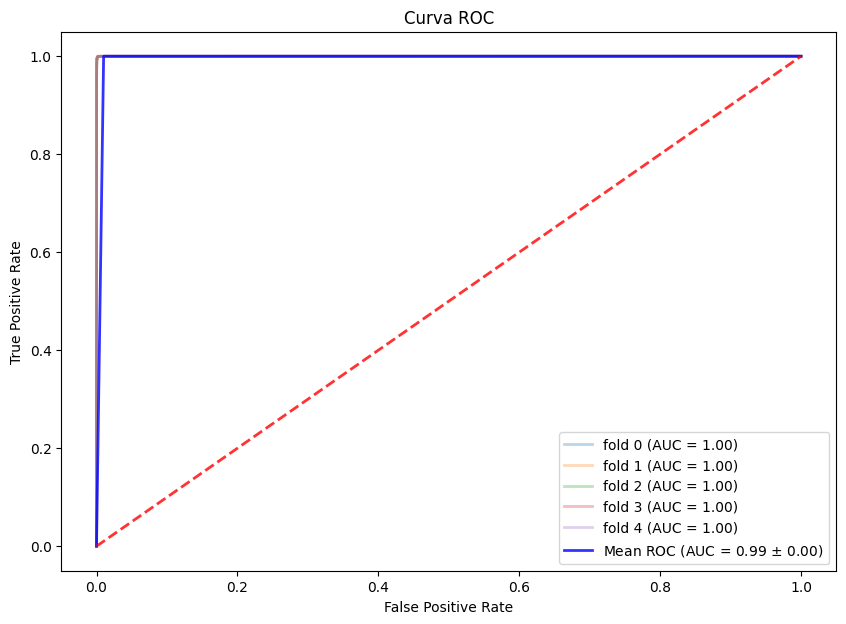

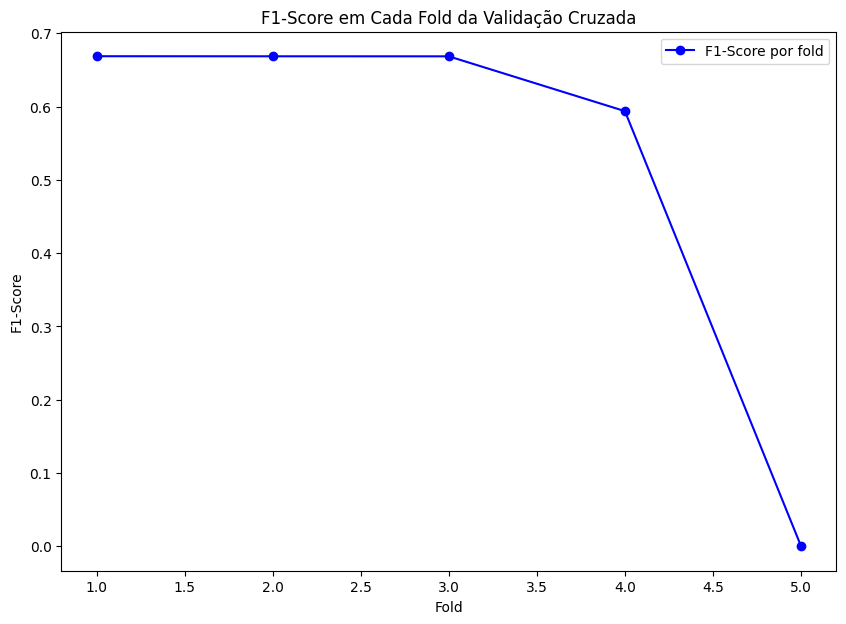

F1 Scores: [0.668756501047292, 0.6686616507067944, 0.668604734014507, 0.5938156501206661, 0.0]
Mean F1 Score: 0.5199677071778519
Standard Deviation F1 Score: 0.26159544910216964


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt


# Separar os dados em características (X) e rótulos (y)
X = df_combined.drop(['0_x', '0_y', 'classe'], axis=1)
y = df_combined['classe']

# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

# Configurar o modelo XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', booster = 'gbtree')

# Configurar a validação cruzada estratificada com 10 folds
skf = StratifiedKFold(n_splits=5)

# Preparar para plotar a curva ROC e F1-Score
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
f1_scores = []

plt.figure(figsize=(10, 7))

for i, (train, test) in enumerate(skf.split(X_training, y_training)):
    xgb_model.fit(X_training.iloc[train], y_training.iloc[train])
    y_pred_proba = xgb_model.predict_proba(X_training.iloc[test])[:, 1]
    y_pred = xgb_model.predict(X_training.iloc[test])

    # Calcular ROC e AUC
    fpr, tpr, _ = roc_curve(y_training.iloc[test], y_pred_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'fold {i} (AUC = {roc_auc:.2f})')
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Calcular F1-Score
    f1 = f1_score(y.iloc[test], y_pred)
    f1_scores.append(f1)

# Plotar a curva ROC média
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plotar a linha de sorte
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Plotar a F1-Score para cada fold
plt.figure(figsize=(10, 7))
plt.plot(range(1, skf.get_n_splits() + 1), f1_scores, marker='o', color='b', label='F1-Score por fold')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.title('F1-Score em Cada Fold da Validação Cruzada')
plt.legend()
plt.show()

print(f"F1 Scores: {f1_scores}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Standard Deviation F1 Score: {np.std(f1_scores)}")


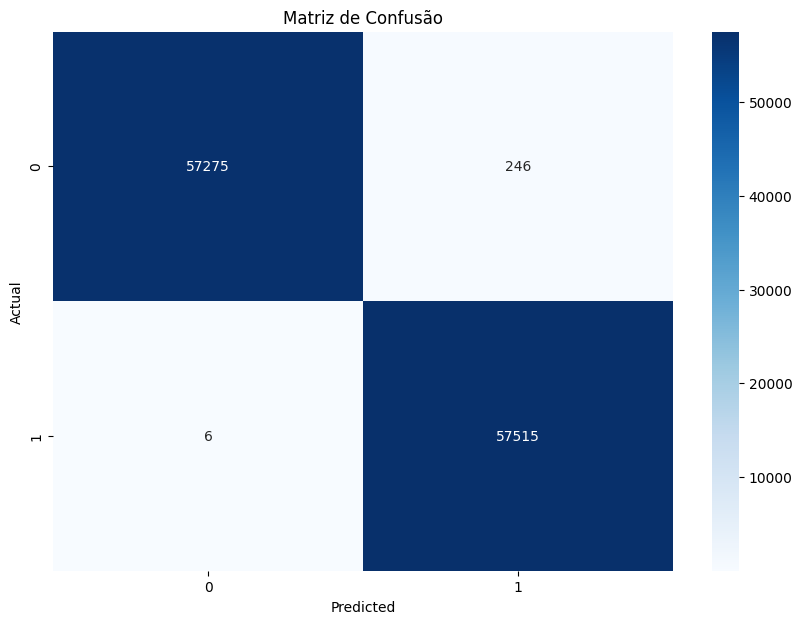

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import seaborn as sns
# import matplotlib.pyplot as plt

# y_pred = xgb_model.predict(X_test)


# # Calculando a matriz de confusão
# cm = confusion_matrix(y_test, y_pred)

# # Plotando a matriz de confusão
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Matriz de Confusão')
# plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/df_to_train_from_biogrig_2023.txt")
df['y'] = 0
df

,Node1,Node2,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,...,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2,y
0,90,2339,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.158191,-0.149639,-0.123831,0.270566,0.232612,-0.326446,-0.346201,0.183630,0.106915,0
1,90,19329,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.298964,-0.528268,-0.275252,-0.125401,0.179447,-0.844776,-0.629700,0.320544,0.220500,0
2,90,80837,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.459091,-0.442345,-0.513818,-0.146825,0.058687,-0.665556,-0.380396,0.151524,0.148959,0
3,90,19338,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.599641,-0.228043,-0.542000,-0.158675,1.041922,-0.796858,-0.075217,0.053919,0.262582,0
4,90,11854,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.504186,-0.602854,-0.427640,-0.124470,-0.029749,-1.034915,-0.474251,-0.071234,0.076339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805567,10075,127018,-0.057260,0.096432,0.073935,-0.027622,-0.134277,0.228500,0.017441,0.094312,...,0.101816,-0.251018,-0.494901,0.617346,0.348455,-0.536403,0.183421,0.019618,0.265278,0
1805568,195814,244310,0.129130,0.197344,-0.297161,0.241578,-0.028605,-0.140719,0.138655,0.292916,...,0.338031,-0.655468,-0.358518,-0.244017,0.108950,-1.089653,-0.182801,0.232815,0.600855,0
1805569,1843,60528,0.044546,0.164422,-0.606549,-0.034957,0.087323,0.489130,-0.005442,0.343067,...,0.094208,-0.076116,-0.019875,0.061767,0.188267,-0.285363,0.043823,0.295294,0.088709,0
1805570,387787,4312,0.041880,0.297795,-0.558717,0.038056,0.068093,-0.066464,-0.097385,-0.588361,...,0.486067,-0.041509,-0.576207,0.068194,-0.071266,0.074516,0.048623,0.275816,0.393777,0


In [ ]:
df_combinado = pd.concat([df_combined, df], ignore_index=True)

In [ ]:
df_combinado

,Node1,Node2,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,...,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2,y
0,359,4052,0.229744,-0.145892,-0.467810,0.294429,0.173089,0.251314,-0.195348,0.248470,...,-0.085282,-0.558535,-0.292554,0.259319,-0.157124,0.331364,0.023952,-0.016260,0.544086,1
1,7364,386724,0.172635,-0.359099,-0.136347,-0.257053,-0.839659,0.676452,0.388749,0.579178,...,-0.520730,-0.202240,-0.347531,-0.079843,0.434286,-0.103309,0.096440,0.536762,0.597158,1
2,10203,497258,0.345711,0.191115,-0.171831,0.014530,-0.432704,-0.161022,-0.263161,-0.891923,...,0.160281,-0.486679,0.076959,0.016536,-0.170650,-0.385519,-0.010951,-0.287452,0.499016,1
3,57419,145581,-0.056860,-0.203674,-0.399705,0.422363,-0.682892,0.761863,-0.126115,0.029416,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
4,7097,3062,-0.373157,0.086090,-0.258872,-0.222608,0.008209,-0.148437,-0.242177,-0.046607,...,-0.654197,-0.637172,0.162118,0.262044,0.384166,0.081225,-0.119329,-0.304046,-0.166391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979873,10075,127018,-0.057260,0.096432,0.073935,-0.027622,-0.134277,0.228500,0.017441,0.094312,...,0.101816,-0.251018,-0.494901,0.617346,0.348455,-0.536403,0.183421,0.019618,0.265278,0
1979874,195814,244310,0.129130,0.197344,-0.297161,0.241578,-0.028605,-0.140719,0.138655,0.292916,...,0.338031,-0.655468,-0.358518,-0.244017,0.108950,-1.089653,-0.182801,0.232815,0.600855,0
1979875,1843,60528,0.044546,0.164422,-0.606549,-0.034957,0.087323,0.489130,-0.005442,0.343067,...,0.094208,-0.076116,-0.019875,0.061767,0.188267,-0.285363,0.043823,0.295294,0.088709,0
1979876,387787,4312,0.041880,0.297795,-0.558717,0.038056,0.068093,-0.066464,-0.097385,-0.588361,...,0.486067,-0.041509,-0.576207,0.068194,-0.071266,0.074516,0.048623,0.275816,0.393777,0


In [ ]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics

# Separar os dados em características (X) e rótulos (y)
X = df_combinado.drop(['Node1', 'Node2', 'y'], axis=1)
y = df_combinado['y']
# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [ ]:
X_training

,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,Emb_8_1,Emb_9_1,...,Emb_40_2,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2
1898666,-0.133736,-0.086492,0.223345,0.002882,-0.139020,0.173481,0.033315,0.049788,-0.319450,-0.224690,...,-0.791647,1.099484,0.106374,-0.673149,1.038456,0.804903,-0.231669,0.524908,-0.576922,0.564828
75585,-0.092306,0.914485,0.509752,-0.308488,-0.121304,0.252747,0.550811,0.386721,-0.457147,0.323751,...,-0.468268,-0.107199,-0.466770,-0.026936,0.013491,-0.352839,0.063465,-0.303787,0.102998,0.637826
128439,0.147724,-0.051677,-0.238706,-0.100774,-0.144431,0.251505,-0.068457,0.102104,-0.272801,0.099597,...,-0.472810,0.124044,-0.223323,-0.212867,-0.049026,0.092554,-0.089986,0.019771,0.037984,0.250141
443797,0.009302,-0.163523,-0.019745,0.156289,0.093703,0.162045,-0.091096,0.239305,-0.146810,-0.050751,...,-0.426258,0.489286,-0.224706,-0.596272,0.125331,0.142255,0.019192,0.055332,-0.038910,0.117375
1765605,-0.146797,-0.262477,-0.206350,-0.297716,-0.056225,0.116542,-0.176566,0.521174,-0.506629,-0.004810,...,-0.203727,0.018175,-0.157677,-0.161263,-0.373769,-0.001012,-0.006822,0.162449,0.017450,0.399909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478502,-0.067774,0.031366,-0.028699,0.101327,0.152658,0.249259,-0.068877,0.180460,-0.182002,-0.233014,...,-0.351681,0.412714,-0.001028,0.076273,0.108249,-0.151954,-0.062916,0.241435,0.185746,0.442431
940454,0.018485,0.205173,-0.234968,0.042047,-0.160799,0.437907,0.134625,-0.332025,-0.125373,-0.154533,...,-0.283899,0.370412,-0.306880,-0.345846,0.278604,0.131549,-0.283413,0.177908,0.263764,0.199661
288092,0.204451,0.142570,-0.122248,-0.070712,-0.157909,0.217822,0.039766,-0.031459,-0.452539,-0.081935,...,-0.372029,0.093023,-0.034831,-0.119719,-0.106547,-0.082855,-0.198703,-0.257505,0.523257,0.228807
1383186,0.115443,0.070357,-0.135615,-0.046059,-0.076106,-0.526358,-0.140823,0.014781,-0.292875,-0.346901,...,-0.432498,0.123362,-0.073730,-0.667659,-0.160604,-0.029911,-0.342342,-0.153493,0.484796,0.837004


In [ ]:
y_training.value_counts()

y
0    1268126
1      58392
Name: count, dtype: int64

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 7
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='logloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)


In [ ]:
xgb_cv_results

{'fit_time': array([63.38266683, 61.35562491]),
 'score_time': array([3.23618793, 3.11082625]),
 'test_accuracy': array([0.99909387, 0.99897777]),
 'test_precision': array([0.99105769, 0.98958422]),
 'test_recall': array([0.9982804 , 0.99850457]),
 'test_f1': array([0.99463998, 0.99399997]),
 'test_roc_auc': array([0.9982804 , 0.99850457])}

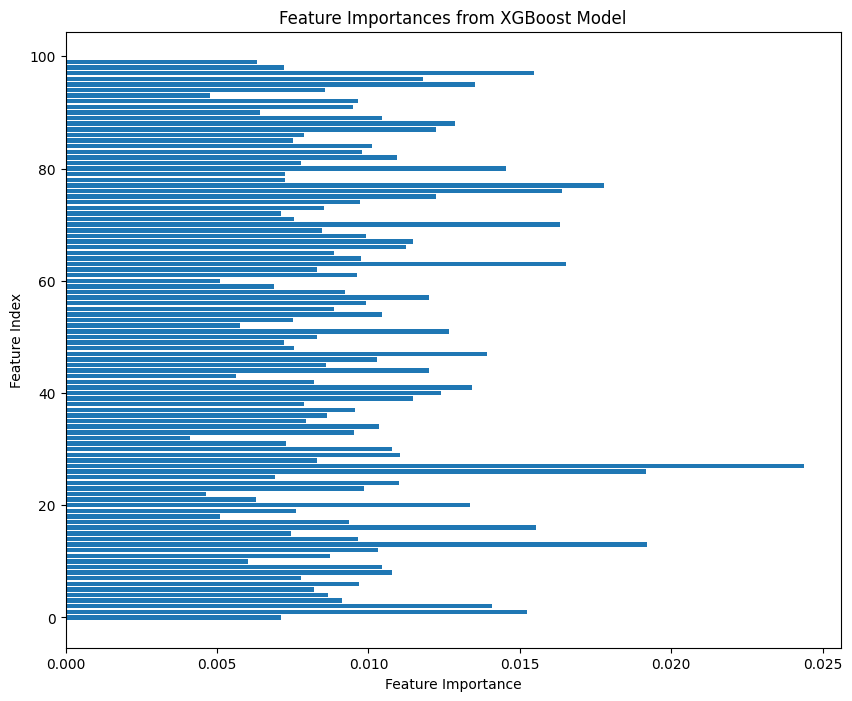

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_training, y_training)


# Extract feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importances from XGBoost Model')
plt.show()


benchmark

In [ ]:
import pandas as pd

# Assuming df_combinado is your dataframe
# Step 1: Identify the Class 1 Samples
class_1_samples = df_combinado[df_combinado['y'] == 1]

# Step 2: Randomly Select Half of Class 1 Samples
half_class_1_samples = class_1_samples.sample(frac=0.5, random_state=42)

# Step 3: Change the Selected Samples to Class 0
df_combinado.loc[half_class_1_samples.index, 'classe'] = 0

# Verify the changes
df_combinado['classe'].value_counts()


classe
0.0    43576
Name: count, dtype: int64

In [ ]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics

# Separar os dados em características (X) e rótulos (y)
X = df_combinado.drop(['Node1', 'Node2', 'y'], axis=1)
y = df_combinado['y']
# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 9
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='logloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)

In [ ]:
xgb_cv_results

{'fit_time': array([7.31624317, 9.79292727]),
 'score_time': array([2.09854221, 2.08965206]),
 'test_accuracy': array([0.99902736, 0.99908918]),
 'test_precision': array([0.99020129, 0.99063287]),
 'test_recall': array([0.99832141, 0.99879462]),
 'test_f1': array([0.99422461, 0.99467659]),
 'test_roc_auc': array([0.99832141, 0.99879462])}

redução dimenssional

In [ ]:
df_combinado.dropna(inplace=True)
df_combinado.isna().sum()

Node1       0
Node2       0
Emb_0_1     0
Emb_1_1     0
Emb_2_1     0
           ..
Emb_46_2    0
Emb_47_2    0
Emb_48_2    0
Emb_49_2    0
y           0
Length: 103, dtype: int64

In [ ]:
class_1_samples = df_combinado[df_combinado['y'] == 1]
class_1_samples.isna().sum()

Node1       0
Node2       0
Emb_0_1     0
Emb_1_1     0
Emb_2_1     0
           ..
Emb_46_2    0
Emb_47_2    0
Emb_48_2    0
Emb_49_2    0
y           0
Length: 103, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load your data into df_combined
# df_combined = pd.read_csv('your_data.csv') # Example loading if data is in a CSV file

# Separate features and labels
X = df_combinado.drop(['y', 'Node1', 'Node2'], axis=1)
y = df_combinado['y']
node1 = df_combinado['Node1']
nnode2 = df_combinado['Node2']




In [ ]:
# Apply PCA to reduce to 20 dimensions
pca = PCA(n_components=99)
X_pca = pca.fit_transform(X)

# Combine the reduced features with labels
df_combined_pca = pd.DataFrame(X_pca)
df_combined_pca['classe'] = y.values
df_combined_pca['Node1'] = node1.values
df_combined_pca['Node2'] = nnode2.values

df_combined_pca


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,classe,Node1,Node2
0,-1.047127,-0.104987,0.035482,0.215038,-0.015243,0.238411,-0.137631,0.094459,-0.900711,-0.000251,...,0.324704,-0.008394,0.183096,-0.137669,0.033923,-0.065978,0.025661,1,359,4052
1,-1.042998,0.367558,0.447949,0.203931,-0.214157,-0.166784,0.151849,-0.302567,-0.731988,0.138505,...,-0.054820,0.029255,-0.167295,-0.067245,-0.162390,-0.287596,0.017951,1,7364,386724
2,-0.066173,-0.515376,-0.283556,0.051233,-0.023156,0.768916,-0.043161,0.234865,-0.179619,0.079327,...,-0.292940,0.143184,-0.165552,0.643291,-0.156397,0.308311,0.076992,1,10203,497258
3,-0.709707,-0.110710,0.411400,0.262679,0.432221,0.069565,0.234354,0.320304,-0.412149,-0.619905,...,0.618413,0.106997,0.013672,0.086874,-0.143618,-0.290610,-0.095124,1,57419,145581
4,-0.961540,0.047777,0.299737,-0.077902,-0.069318,-0.135243,0.255178,-0.320868,0.339652,0.117870,...,-0.334042,0.026520,-0.058000,0.083003,0.064452,-0.204026,0.038474,1,7097,3062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979525,0.055495,0.211310,0.235808,-0.132265,-0.073301,0.062563,-0.296745,0.000154,0.149386,0.333175,...,0.026860,-0.084398,-0.155844,-0.008418,-0.125870,-0.049632,0.019267,0,10075,127018
1979526,-0.154387,-0.531974,-0.360923,0.266856,0.287755,-0.592598,0.021884,0.325857,-0.046959,-0.308423,...,-0.191616,0.409099,-0.009034,0.013133,0.028048,0.047418,0.098980,0,195814,244310
1979527,0.127596,0.074259,0.421699,-0.223801,-0.147182,0.098620,-0.461794,0.247481,-0.066708,0.253011,...,0.136956,0.173948,0.037782,0.003094,0.103648,-0.038598,-0.005198,0,1843,60528
1979528,-0.481598,-0.344657,-0.337664,0.052922,-0.385594,0.326352,0.399837,-0.198999,-0.199244,0.624738,...,-0.148538,-0.036535,0.065106,0.279415,0.132008,0.150727,0.127181,0,387787,4312


In [ ]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics

# Separar os dados em características (X) e rótulos (y)
X = df_combined_pca.drop(['Node1', 'Node2', 'classe'], axis=1)
y = df_combined_pca['classe']
# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.33, random_state = 99, stratify = y)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 9
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='logloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)

In [ ]:
xgb_cv_results

{'fit_time': array([6.82198453, 6.89670372]),
 'score_time': array([2.04735112, 2.03892493]),
 'test_accuracy': array([0.96593797, 0.96626514]),
 'test_precision': array([0.88387904, 0.88760966]),
 'test_recall': array([0.64852169, 0.65308625]),
 'test_f1': array([0.70960118, 0.71499959]),
 'test_roc_auc': array([0.64852169, 0.65308625])}

tsne

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

# Load your data into df_combined
# df_combined = pd.read_csv('your_data.csv') # Example loading if data is in a CSV file

# Separate features and labels
X = df_combinado.drop(['y', 'Node1', 'Node2'], axis=1)
y = df_combinado['y']
node1 = df_combinado['Node1']
nnode2 = df_combinado['Node2']

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)







In [ ]:
df_combined

,Node1,Node2,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,...,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2,y
0,359,4052,0.229744,-0.145892,-0.467810,0.294429,0.173089,0.251314,-0.195348,0.248470,...,-0.085282,-0.558535,-0.292554,0.259319,-0.157124,0.331364,0.023952,-0.016260,0.544086,1
1,7364,386724,0.172635,-0.359099,-0.136347,-0.257053,-0.839659,0.676452,0.388749,0.579178,...,-0.520730,-0.202240,-0.347531,-0.079843,0.434286,-0.103309,0.096440,0.536762,0.597158,1
2,10203,497258,0.345711,0.191115,-0.171831,0.014530,-0.432704,-0.161022,-0.263161,-0.891923,...,0.160281,-0.486679,0.076959,0.016536,-0.170650,-0.385519,-0.010951,-0.287452,0.499016,1
3,57419,145581,-0.056860,-0.203674,-0.399705,0.422363,-0.682892,0.761863,-0.126115,0.029416,...,0.460582,-0.163186,-0.445787,-0.056085,0.192838,0.151205,-0.495517,0.377574,0.757777,1
4,7097,3062,-0.373157,0.086090,-0.258872,-0.222608,0.008209,-0.148437,-0.242177,-0.046607,...,-0.654197,-0.637172,0.162118,0.262044,0.384166,0.081225,-0.119329,-0.304046,-0.166391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174301,4719,338872,-0.372214,-0.037197,-0.307473,0.320801,-0.093167,0.099319,0.080622,-0.156549,...,0.043758,-0.524071,-0.284566,0.127912,0.060188,0.564355,0.252153,0.261959,0.364484,0
174302,4609,64225,0.031637,0.165369,-0.159585,0.184160,-0.056359,0.033383,-0.167151,0.072863,...,-0.355839,-0.349512,-0.168503,0.124261,0.402184,0.070327,-0.043323,-0.195264,0.007852,0
174303,10134,7461,-0.257145,0.038250,-0.245239,0.000499,-0.224306,0.149537,0.039121,-0.154808,...,0.409812,-0.381928,-0.130585,-0.009215,0.570952,-0.103610,-0.143821,-0.095287,0.389016,0
174304,79590,6182,-0.283662,0.173591,-0.492094,0.280300,-0.078656,-0.155066,-0.096032,0.282248,...,0.100625,0.028767,-0.163858,0.008503,0.135741,-0.371857,0.090683,0.177711,0.101593,0


In [ ]:
# Combine the reduced features with labels
df_combined_tsne = pd.DataFrame(X_tsne, columns=['dim1', 'dim2', 'dim3'])
df_combined_tsne['classe'] = y.values
df_combined_tsne['Node1'] = node1.values
df_combined_tsne['Node2'] = nnode2.values


ValueError: Length of values (1979530) does not match length of index (174306)

In [ ]:
df_combined_tsne

,dim1,dim2,dim3,classe
0,-31.871803,-7.253228,14.267820,1
1,-24.415897,15.467766,-29.454418,1
2,-16.560623,39.651741,19.596655,1
3,-33.385391,8.591013,1.670226,1
4,-8.840928,13.778653,-14.734794,1
...,...,...,...,...
174301,-19.487913,6.591778,42.075035,0
174302,-8.429083,-28.881788,-0.692879,0
174303,5.267408,-35.794434,-10.136431,0
174304,2.237705,-32.576607,37.736710,0


In [ ]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics

# Separar os dados em características (X) e rótulos (y)
X = df_combined_tsne.drop(['classe'], axis=1)
y = df_combined_tsne['classe']
# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.33, random_state = 99, stratify = y)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 9
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='mlogloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)

In [ ]:
xgb_cv_results

{'fit_time': array([0.34339952, 0.90623403]),
 'score_time': array([0.06634068, 0.04851222]),
 'test_accuracy': array([0.97348997, 0.97415742]),
 'test_precision': array([0.97354296, 0.97422213]),
 'test_recall': array([0.97350146, 0.9741466 ]),
 'test_f1': array([0.97348959, 0.97415601]),
 'test_roc_auc': array([0.97350146, 0.9741466 ])}

reduzir manualmente as dimensoes

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import random

# Separate features and labels
X = df_combined.drop(['y', 'Node1', 'Node2'], axis=1)
y = df_combined['y']
node1 = df_combined['Node1']
nnode2 = df_combined['Node2']

# Randomly select 94 columns to drop
columns_to_drop = random.sample(list(X.columns), 94)
X_reduced = X.drop(columns_to_drop, axis=1)

# Separating the training data and test data

X_training, X_test, y_training, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state = 7, stratify = y)


import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 9
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='logloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)


In [ ]:
xgb_cv_results

{'fit_time': array([0.34698176, 0.68738461]),
 'score_time': array([0.12075233, 0.05101252]),
 'test_accuracy': array([0.98234377, 0.97871284]),
 'test_precision': array([0.98275704, 0.97918807]),
 'test_recall': array([0.98233214, 0.97872593]),
 'test_f1': array([0.98233967, 0.97870797]),
 'test_roc_auc': array([0.98233214, 0.97872593])}

benchmark

In [ ]:
import pandas as pd

# Assuming df_combinado is your dataframe
# Step 1: Identify the Class 1 Samples
class_1_samples = df_combined[df_combined['y'] == 1]

# Step 2: Randomly Select Half of Class 1 Samples
half_class_1_samples = class_1_samples.sample(frac=0.5, random_state=42)

# Step 3: Change the Selected Samples to Class 0
df_combined.loc[half_class_1_samples.index, 'y'] = 0

# Verify the changes
df_combined['y'].value_counts()

y
0    168859
1      5447
Name: count, dtype: int64

In [ ]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics


# Separate features and labels
X = df_combined.drop(['y', 'Node1', 'Node2'], axis=1)
y = df_combined['y']
node1 = df_combined['Node1']
nnode2 = df_combined['Node2']

# Randomly select 94 columns to drop
columns_to_drop = random.sample(list(X.columns), 94)
X_reduced = X.drop(columns_to_drop, axis=1)

X_training, X_test, y_training, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state = 7, stratify = y)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from itertools import combinations
import random
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#defining values to folds

num_folds = 2
seed = 9
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='logloss', booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, y_training, cv = kf, scoring=custom_scorer)

In [ ]:
xgb_cv_results

{'fit_time': array([0.18349004, 0.17472076]),
 'score_time': array([0.1386416 , 0.13844419]),
 'test_accuracy': array([0.96818112, 0.96840321]),
 'test_precision': array([0.51200904, 0.51863194]),
 'test_recall': array([0.50012114, 0.50046782]),
 'test_f1': array([0.49245417, 0.49359433]),
 'test_roc_auc': array([0.50012114, 0.50046782])}